In [1]:
# 2018-07-10
# A. Pendleton
# Calculating gene model statistics at various stages
# Stats include intron/exon lengths, GC content, etc.

In [29]:
#this uses iPython magic to make plots appear inline
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import sys
import numpy as np
import matplotlib.patches as patches
import gzip
import fileinput
import glob
from scipy import stats
import re
from matplotlib_venn import venn3, venn3_circles
from collections import OrderedDict
import seaborn as sns

def count_lines(f):
    lineCount = 0
    with open(f, 'r') as f:
        for line in f:
            lineCount += 1
        return lineCount
def runCMD(cmd):
    val = subprocess.Popen(cmd, shell=True).wait()
    if val == 0:
        pass
    else:
        print ('command failed')
        print (cmd)
        sys.exit(1)
# TO REMOVE TOP AND RIGHT AXIS OF PLOTS
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

# PASA OUTPUTS
## Calculating Stats using 2 thresholds of maximum intron lengths during PASA processing: 
## Length 1 = 10,000 bp, Length 2 = 100,000 bp (default for PASA)

In [71]:
length1File = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/PASA_Processing/pasa-lite_assemblyAssembler_results/pasa-lite_ZoeyTrinity.pasa_assembled_alignments.gtf'

#Keeping track of exon counts/lengths
length1ExonLengths = []
length1ExonCounts = []
exon1Dict = {}
#Keeping track of intron stats
length1IntronLengths = []
intron1Dict = {}

#Keeping track of full leng
length1TranscriptLengths = []

lineCount,transcriptCount = 0,0 
exonCount = 0 # for first call, set to zero

for line in open(length1File,'r'):
    lineCount += 1        
    line=line.rstrip().split('\t')
    if '#' in line[0] or len(line) == 1: #skip header
        continue
    
    #calculate start/end coordinates
    start,end = int(line[3]) - 1, int(line[4])
    length = end - start
    
    if 'transcript' in line[2]:
        transcriptCount += 1
        length1TranscriptLengths.append(length)
        if lineCount != 2:
            length1ExonCounts.append(exonCount) #add the count from the previous gene
        exonCount = 0 #reset the count to zero with each new transcript
        exonCoords, e = [], -1 # to keep track of the start, end coordinates of each exon
        i = 0 #intron index
        
    if 'exon' in line[2]:
        #Add exon length to array:
        length1ExonLengths.append(length)
        exonCount += 1 #Keep track of exon count
        e += 1 #for dict/array index
        exonCoords.append([start,end]) #start/end coordinates per exon
        
        #Storing exon length by exon number:
        if e+1 not in exon1Dict.keys():
            exon1Dict[e+1] = []
        exon1Dict[e+1].append(length)    
        
    # Get intron lengths, means that the gene must have more than one exon
    if exonCount > 1:
        i += 1 #intron index = intron number
        
        #Intron size depends on coordinates of the exons A and B surrounding it:
        startB, endA = exonCoords[e-1][1],exonCoords[e][0]
        intronLength = int(endA) - int(startB)
        length1IntronLengths.append(intronLength)
        
        if intronLength > 1000000:
            print('long: ',line)
        if intronLength < 0:
            print('negative: ',line) 
            
        #Storing intron length by intron number:
        if i not in intron1Dict.keys():
            intron1Dict[i] = []
        intron1Dict[i].append(intronLength)

        
print('Stored transcript, exon, and intron stats for %i transcripts' % transcriptCount)


negative:  ['chr25', 'PASA', 'exon', '6837', '6895', '.', '-', '.', 'gene_id "chr25.g3"; transcript_id "chr25.g3.i1";']
negative:  ['chr3', 'PASA', 'exon', '30529', '30799', '.', '-', '.', 'gene_id "chr3.g5"; transcript_id "chr3.g5.i1";']
negative:  ['chr3', 'PASA', 'exon', '26072', '26294', '.', '-', '.', 'gene_id "chr3.g11"; transcript_id "chr3.g11.i1";']
negative:  ['chr3', 'PASA', 'exon', '30091', '30541', '.', '-', '.', 'gene_id "chr3.g18"; transcript_id "chr3.g18.i1";']
negative:  ['chr3', 'PASA', 'exon', '17287', '18285', '.', '-', '.', 'gene_id "chr3.g19"; transcript_id "chr3.g19.i1";']
negative:  ['chr25', 'PASA', 'exon', '68638', '68996', '.', '-', '.', 'gene_id "chr25.g77"; transcript_id "chr25.g77.i1";']
negative:  ['chr25', 'PASA', 'exon', '70120', '71164', '.', '-', '.', 'gene_id "chr25.g80"; transcript_id "chr25.g80.i1";']
negative:  ['chr3', 'PASA', 'exon', '78756', '78908', '.', '+', '.', 'gene_id "chr3.g102"; transcript_id "chr3.g102.i3";']
negative:  ['chr3', 'PASA',

negative:  ['chr25', 'PASA', 'exon', '14976300', '14976351', '.', '+', '.', 'gene_id "chr25.g6462"; transcript_id "chr25.g6462.i1";']
negative:  ['chr25', 'PASA', 'exon', '15081840', '15081883', '.', '-', '.', 'gene_id "chr25.g6515"; transcript_id "chr25.g6515.i1";']
negative:  ['chr25', 'PASA', 'exon', '15184532', '15184565', '.', '+', '.', 'gene_id "chr25.g6534"; transcript_id "chr25.g6534.i1";']
negative:  ['chr25', 'PASA', 'exon', '15571442', '15571491', '.', '-', '.', 'gene_id "chr25.g6638"; transcript_id "chr25.g6638.i1";']
negative:  ['chr3', 'PASA', 'exon', '24108059', '24108234', '.', '+', '.', 'gene_id "chr3.g6737"; transcript_id "chr3.g6737.i1";']
negative:  ['chr3', 'PASA', 'exon', '24290648', '24290684', '.', '-', '.', 'gene_id "chr3.g6821"; transcript_id "chr3.g6821.i1";']
negative:  ['chr25', 'PASA', 'exon', '16800689', '16800936', '.', '+', '.', 'gene_id "chr25.g6835"; transcript_id "chr25.g6835.i1";']
negative:  ['chr25', 'PASA', 'exon', '16800917', '16801205', '.', '-

negative:  ['chr3', 'PASA', 'exon', '40969760', '40969946', '.', '+', '.', 'gene_id "chr3.g12948"; transcript_id "chr3.g12948.i1";']
negative:  ['chr25', 'PASA', 'exon', '34062900', '34063158', '.', '-', '.', 'gene_id "chr25.g12845"; transcript_id "chr25.g12845.i1";']
negative:  ['chr3', 'PASA', 'exon', '41298262', '41298504', '.', '+', '.', 'gene_id "chr3.g13116"; transcript_id "chr3.g13116.i2";']
negative:  ['chr3', 'PASA', 'exon', '41300763', '41300985', '.', '-', '.', 'gene_id "chr3.g13120"; transcript_id "chr3.g13120.i1";']
negative:  ['chr25', 'PASA', 'exon', '34464058', '34464258', '.', '-', '.', 'gene_id "chr25.g13056"; transcript_id "chr25.g13056.i1";']
negative:  ['chr3', 'PASA', 'exon', '41841780', '41842357', '.', '+', '.', 'gene_id "chr3.g13404"; transcript_id "chr3.g13404.i1";']
negative:  ['chr3', 'PASA', 'exon', '41882912', '41883519', '.', '-', '.', 'gene_id "chr3.g13452"; transcript_id "chr3.g13452.i1";']
negative:  ['chr25', 'PASA', 'exon', '34900848', '34901438', '.

negative:  ['chr3', 'PASA', 'exon', '57298365', '57298661', '.', '+', '.', 'gene_id "chr3.g19430"; transcript_id "chr3.g19430.i1";']
negative:  ['chr3', 'PASA', 'exon', '57298734', '57298914', '.', '+', '.', 'gene_id "chr3.g19431"; transcript_id "chr3.g19431.i1";']
negative:  ['chr3', 'PASA', 'exon', '57337388', '57337543', '.', '-', '.', 'gene_id "chr3.g19483"; transcript_id "chr3.g19483.i1";']
negative:  ['chr25', 'PASA', 'exon', '48468701', '48468761', '.', '-', '.', 'gene_id "chr25.g19326"; transcript_id "chr25.g19326.i1";']
negative:  ['chr25', 'PASA', 'exon', '48518438', '48518629', '.', '-', '.', 'gene_id "chr25.g19368"; transcript_id "chr25.g19368.i1";']
negative:  ['chr25', 'PASA', 'exon', '48536575', '48536628', '.', '-', '.', 'gene_id "chr25.g19382"; transcript_id "chr25.g19382.i1";']
negative:  ['chr25', 'PASA', 'exon', '48645245', '48645283', '.', '+', '.', 'gene_id "chr25.g19460"; transcript_id "chr25.g19460.i1";']
negative:  ['chr25', 'PASA', 'exon', '48734599', '4873476

negative:  ['chr3', 'PASA', 'exon', '71515566', '71516043', '.', '-', '.', 'gene_id "chr3.g24439"; transcript_id "chr3.g24439.i1";']
negative:  ['chr3', 'PASA', 'exon', '71648995', '71649216', '.', '-', '.', 'gene_id "chr3.g24527"; transcript_id "chr3.g24527.i1";']
negative:  ['chr3', 'PASA', 'exon', '71768417', '71768467', '.', '-', '.', 'gene_id "chr3.g24576"; transcript_id "chr3.g24576.i1";']
negative:  ['chr3', 'PASA', 'exon', '71837050', '71837082', '.', '+', '.', 'gene_id "chr3.g24645"; transcript_id "chr3.g24645.i1";']
negative:  ['chr3', 'PASA', 'exon', '71842956', '71843175', '.', '-', '.', 'gene_id "chr3.g24658"; transcript_id "chr3.g24658.i1";']
negative:  ['chr3', 'PASA', 'exon', '72076202', '72076242', '.', '+', '.', 'gene_id "chr3.g24878"; transcript_id "chr3.g24878.i1";']
negative:  ['chr3', 'PASA', 'exon', '72092560', '72092732', '.', '-', '.', 'gene_id "chr3.g24907"; transcript_id "chr3.g24907.i1";']
negative:  ['chr3', 'PASA', 'exon', '72198485', '72198770', '.', '+',

negative:  ['chr3', 'PASA', 'exon', '90935946', '90935980', '.', '+', '.', 'gene_id "chr3.g29751"; transcript_id "chr3.g29751.i1";']
negative:  ['chr3', 'PASA', 'exon', '90972651', '90972753', '.', '+', '.', 'gene_id "chr3.g29758"; transcript_id "chr3.g29758.i1";']
negative:  ['chr3', 'PASA', 'exon', '91353120', '91353536', '.', '+', '.', 'gene_id "chr3.g29858"; transcript_id "chr3.g29858.i1";']
negative:  ['chr3', 'PASA', 'exon', '91363463', '91363750', '.', '-', '.', 'gene_id "chr3.g29867"; transcript_id "chr3.g29867.i1";']
negative:  ['chr3', 'PASA', 'exon', '91363178', '91363478', '.', '-', '.', 'gene_id "chr3.g29869"; transcript_id "chr3.g29869.i1";']
negative:  ['chr3', 'PASA', 'exon', '91364119', '91364362', '.', '+', '.', 'gene_id "chr3.g29870"; transcript_id "chr3.g29870.i1";']
negative:  ['chr3', 'PASA', 'exon', '91809753', '91809908', '.', '-', '.', 'gene_id "chr3.g30207"; transcript_id "chr3.g30207.i1";']
negative:  ['chr3', 'PASA', 'exon', '91809917', '91810104', '.', '-',

negative:  ['chr11', 'PASA', 'exon', '40206355', '40206493', '.', '+', '.', 'gene_id "chr11.g13949"; transcript_id "chr11.g13949.i1";']
negative:  ['chr11', 'PASA', 'exon', '40028046', '40028354', '.', '-', '.', 'gene_id "chr11.g14024"; transcript_id "chr11.g14024.i1";']
negative:  ['chr11', 'PASA', 'exon', '40510575', '40510814', '.', '+', '.', 'gene_id "chr11.g14202"; transcript_id "chr11.g14202.i1";']
negative:  ['chr11', 'PASA', 'exon', '40510837', '40511044', '.', '+', '.', 'gene_id "chr11.g14203"; transcript_id "chr11.g14203.i1";']
negative:  ['chr14', 'PASA', 'exon', '6778411', '6778464', '.', '-', '.', 'gene_id "chr14.g2748"; transcript_id "chr14.g2748.i2";']
negative:  ['chr14', 'PASA', 'exon', '6817004', '6818772', '.', '-', '.', 'gene_id "chr14.g2763"; transcript_id "chr14.g2763.i1";']
negative:  ['chr14', 'PASA', 'exon', '6881425', '6881759', '.', '-', '.', 'gene_id "chr14.g2817"; transcript_id "chr14.g2817.i1";']
negative:  ['chr14', 'PASA', 'exon', '6881764', '6882676', '

negative:  ['chr14', 'PASA', 'exon', '36785981', '36786112', '.', '-', '.', 'gene_id "chr14.g11156"; transcript_id "chr14.g11156.i1";']
negative:  ['chr11', 'PASA', 'exon', '65797699', '65797733', '.', '+', '.', 'gene_id "chr11.g23079"; transcript_id "chr11.g23079.i1";']
negative:  ['chr11', 'PASA', 'exon', '65925494', '65926056', '.', '-', '.', 'gene_id "chr11.g23209"; transcript_id "chr11.g23209.i1";']
negative:  ['chr11', 'PASA', 'exon', '66196513', '66196699', '.', '+', '.', 'gene_id "chr11.g23341"; transcript_id "chr11.g23341.i1";']
negative:  ['chr14', 'PASA', 'exon', '38535150', '38535336', '.', '-', '.', 'gene_id "chr14.g11734"; transcript_id "chr14.g11734.i1";']
negative:  ['chr14', 'PASA', 'exon', '38535493', '38535759', '.', '-', '.', 'gene_id "chr14.g11735"; transcript_id "chr14.g11735.i1";']
negative:  ['chr11', 'PASA', 'exon', '66924534', '66924737', '.', '-', '.', 'gene_id "chr11.g23829"; transcript_id "chr11.g23829.i1";']
negative:  ['chr14', 'PASA', 'exon', '39541683',

negative:  ['chr14', 'PASA', 'exon', '55936751', '55937073', '.', '-', '.', 'gene_id "chr14.g17881"; transcript_id "chr14.g17881.i1";']
negative:  ['chr14', 'PASA', 'exon', '56627600', '56627749', '.', '+', '.', 'gene_id "chr14.g18123"; transcript_id "chr14.g18123.i1";']
negative:  ['chr14', 'PASA', 'exon', '56627754', '56628091', '.', '-', '.', 'gene_id "chr14.g18124"; transcript_id "chr14.g18124.i1";']
negative:  ['chr14', 'PASA', 'exon', '57034809', '57034857', '.', '-', '.', 'gene_id "chr14.g18241"; transcript_id "chr14.g18241.i1";']
negative:  ['chr14', 'PASA', 'exon', '59209358', '59209882', '.', '+', '.', 'gene_id "chr14.g18485"; transcript_id "chr14.g18485.i1";']
negative:  ['chr14', 'PASA', 'exon', '59390574', '59390758', '.', '-', '.', 'gene_id "chr14.g18672"; transcript_id "chr14.g18672.i1";']
negative:  ['chr14', 'PASA', 'exon', '59547872', '59548114', '.', '+', '.', 'gene_id "chr14.g18781"; transcript_id "chr14.g18781.i1";']
negative:  ['chr14', 'PASA', 'exon', '60050823',

negative:  ['chr10', 'PASA', 'exon', '17578439', '17578498', '.', '-', '.', 'gene_id "chr10.g6872"; transcript_id "chr10.g6872.i2";']
negative:  ['chr10', 'PASA', 'exon', '18700536', '18700696', '.', '+', '.', 'gene_id "chr10.g7099"; transcript_id "chr10.g7099.i1";']
negative:  ['chr10', 'PASA', 'exon', '20225500', '20225701', '.', '-', '.', 'gene_id "chr10.g7533"; transcript_id "chr10.g7533.i1";']
negative:  ['chr10', 'PASA', 'exon', '20226661', '20226938', '.', '+', '.', 'gene_id "chr10.g7534"; transcript_id "chr10.g7534.i1";']
negative:  ['chr10', 'PASA', 'exon', '20434616', '20435417', '.', '+', '.', 'gene_id "chr10.g7671"; transcript_id "chr10.g7671.i1";']
negative:  ['chr10', 'PASA', 'exon', '20436669', '20436921', '.', '+', '.', 'gene_id "chr10.g7674"; transcript_id "chr10.g7674.i1";']
negative:  ['chr10', 'PASA', 'exon', '20586297', '20586890', '.', '-', '.', 'gene_id "chr10.g7816"; transcript_id "chr10.g7816.i1";']
negative:  ['chr10', 'PASA', 'exon', '20743048', '20743347', '

negative:  ['chr23', 'PASA', 'exon', '3563602', '3563653', '.', '-', '.', 'gene_id "chr23.g1712"; transcript_id "chr23.g1712.i1";']
negative:  ['chr23', 'PASA', 'exon', '3598336', '3598480', '.', '+', '.', 'gene_id "chr23.g1740"; transcript_id "chr23.g1740.i2";']
negative:  ['chr23', 'PASA', 'exon', '3638093', '3638375', '.', '-', '.', 'gene_id "chr23.g1787"; transcript_id "chr23.g1787.i1";']
negative:  ['chr23', 'PASA', 'exon', '3781177', '3781404', '.', '+', '.', 'gene_id "chr23.g1885"; transcript_id "chr23.g1885.i2";']
negative:  ['chr23', 'PASA', 'exon', '3781411', '3781443', '.', '-', '.', 'gene_id "chr23.g1887"; transcript_id "chr23.g1887.i1";']
negative:  ['chr23', 'PASA', 'exon', '3781411', '3782005', '.', '-', '.', 'gene_id "chr23.g1887"; transcript_id "chr23.g1887.i2";']
negative:  ['chr23', 'PASA', 'exon', '3883597', '3883832', '.', '-', '.', 'gene_id "chr23.g1971"; transcript_id "chr23.g1971.i1";']
negative:  ['chr23', 'PASA', 'exon', '3886744', '3887009', '.', '+', '.', 'g

negative:  ['chr23', 'PASA', 'exon', '20676803', '20676838', '.', '+', '.', 'gene_id "chr23.g8093"; transcript_id "chr23.g8093.i1";']
negative:  ['chr1', 'PASA', 'exon', '23960041', '23960239', '100', '+', '.', 'gene_id "chr1.g48340"; transcript_id "blat.proc4587.chain_14008";']
negative:  ['chr1', 'PASA', 'exon', '23925899', '23926160', '100', '-', '.', 'gene_id "chr1.g52686"; transcript_id "blat.proc4587.chain_14009";']
negative:  ['chr23', 'PASA', 'exon', '21362723', '21362784', '.', '+', '.', 'gene_id "chr23.g8166"; transcript_id "chr23.g8166.i1";']
negative:  ['chr23', 'PASA', 'exon', '21855400', '21855852', '.', '-', '.', 'gene_id "chr23.g8217"; transcript_id "chr23.g8217.i1";']
negative:  ['scaffold_1549', 'PASA', 'exon', '19888', '19920', '.', '-', '.', 'gene_id "scaffold_1549.g1"; transcript_id "scaffold_1549.g1.i1";']
negative:  ['scaffold_1549', 'PASA', 'exon', '2078', '2163', '100', '+', '.', 'gene_id "scaffold_1549.g2"; transcript_id "blat.proc4587.chain_9011";']
negative:

negative:  ['chr37', 'PASA', 'exon', '6823681', '6823831', '.', '+', '.', 'gene_id "chr37.g2210"; transcript_id "chr37.g2210.i1";']
negative:  ['chr37', 'PASA', 'exon', '6830400', '6830742', '.', '+', '.', 'gene_id "chr37.g2211"; transcript_id "chr37.g2211.i1";']
negative:  ['chr37', 'PASA', 'exon', '6833450', '6833702', '.', '-', '.', 'gene_id "chr37.g2214"; transcript_id "chr37.g2214.i1";']
negative:  ['chr37', 'PASA', 'exon', '6843953', '6844112', '.', '-', '.', 'gene_id "chr37.g2217"; transcript_id "chr37.g2217.i1";']
negative:  ['chr37', 'PASA', 'exon', '6848026', '6848221', '.', '-', '.', 'gene_id "chr37.g2223"; transcript_id "chr37.g2223.i1";']
negative:  ['chr37', 'PASA', 'exon', '6848775', '6849027', '.', '-', '.', 'gene_id "chr37.g2227"; transcript_id "chr37.g2227.i1";']
negative:  ['chr37', 'PASA', 'exon', '6849019', '6849202', '.', '-', '.', 'gene_id "chr37.g2228"; transcript_id "chr37.g2228.i1";']
negative:  ['chr37', 'PASA', 'exon', '6852642', '6853193', '.', '+', '.', 'g

negative:  ['chr37', 'PASA', 'exon', '11097741', '11097931', '.', '+', '.', 'gene_id "chr37.g4063"; transcript_id "chr37.g4063.i1";']
negative:  ['chr37', 'PASA', 'exon', '11103309', '11103470', '.', '+', '.', 'gene_id "chr37.g4067"; transcript_id "chr37.g4067.i1";']
negative:  ['chr37', 'PASA', 'exon', '11103655', '11104090', '.', '-', '.', 'gene_id "chr37.g4068"; transcript_id "chr37.g4068.i1";']
negative:  ['chr37', 'PASA', 'exon', '11103616', '11103674', '.', '-', '.', 'gene_id "chr37.g4068"; transcript_id "chr37.g4068.i2";']
negative:  ['chr37', 'PASA', 'exon', '11106935', '11107916', '.', '-', '.', 'gene_id "chr37.g4071"; transcript_id "chr37.g4071.i2";']
negative:  ['chr37', 'PASA', 'exon', '11116834', '11117306', '.', '-', '.', 'gene_id "chr37.g4085"; transcript_id "chr37.g4085.i1";']
negative:  ['chr37', 'PASA', 'exon', '11116834', '11117689', '.', '-', '.', 'gene_id "chr37.g4085"; transcript_id "chr37.g4085.i2";']
negative:  ['chr37', 'PASA', 'exon', '11117288', '11117689', '

negative:  ['chr37', 'PASA', 'exon', '22380883', '22381408', '.', '+', '.', 'gene_id "chr37.g8008"; transcript_id "chr37.g8008.i1";']
negative:  ['chr37', 'PASA', 'exon', '22388823', '22389013', '.', '-', '.', 'gene_id "chr37.g8011"; transcript_id "chr37.g8011.i1";']
negative:  ['chr37', 'PASA', 'exon', '22381545', '22381713', '.', '-', '.', 'gene_id "chr37.g8014"; transcript_id "chr37.g8014.i1";']
negative:  ['chr37', 'PASA', 'exon', '22422966', '22423162', '.', '-', '.', 'gene_id "chr37.g8016"; transcript_id "chr37.g8016.i1";']
negative:  ['chr37', 'PASA', 'exon', '22429316', '22429539', '.', '+', '.', 'gene_id "chr37.g8018"; transcript_id "chr37.g8018.i1";']
negative:  ['chr37', 'PASA', 'exon', '22372626', '22372960', '.', '-', '.', 'gene_id "chr37.g8020"; transcript_id "chr37.g8020.i1";']
negative:  ['chr37', 'PASA', 'exon', '22375242', '22377463', '.', '+', '.', 'gene_id "chr37.g8021"; transcript_id "chr37.g8021.i1";']
negative:  ['chr37', 'PASA', 'exon', '22369070', '22369490', '

negative:  ['chr9', 'PASA', 'exon', '1768019', '1768184', '.', '+', '.', 'gene_id "chr9.g1500"; transcript_id "chr9.g1500.i2";']
negative:  ['chr23', 'PASA', 'exon', '52223318', '52223591', '.', '-', '.', 'gene_id "chr23.g19575"; transcript_id "chr23.g19575.i2";']
negative:  ['chr23', 'PASA', 'exon', '52245177', '52245220', '.', '+', '.', 'gene_id "chr23.g19585"; transcript_id "chr23.g19585.i1";']
negative:  ['chr23', 'PASA', 'exon', '52245182', '52245220', '.', '+', '.', 'gene_id "chr23.g19585"; transcript_id "chr23.g19585.i2";']
negative:  ['chr23', 'PASA', 'exon', '52245187', '52245220', '.', '+', '.', 'gene_id "chr23.g19585"; transcript_id "chr23.g19585.i3";']
negative:  ['chr9', 'PASA', 'exon', '2020915', '2020945', '.', '+', '.', 'gene_id "chr9.g1593"; transcript_id "chr9.g1593.i1";']
negative:  ['chr9', 'PASA', 'exon', '2188248', '2188401', '.', '+', '.', 'gene_id "chr9.g1720"; transcript_id "chr9.g1720.i1";']
negative:  ['chr23', 'PASA', 'exon', '52570302', '52570491', '.', '+'

negative:  ['chr9', 'PASA', 'exon', '9646517', '9646802', '.', '-', '.', 'gene_id "chr9.g5791"; transcript_id "chr9.g5791.i2";']
negative:  ['chr9', 'PASA', 'exon', '9681237', '9681273', '.', '+', '.', 'gene_id "chr9.g5799"; transcript_id "chr9.g5799.i1";']
negative:  ['chr9', 'PASA', 'exon', '9708601', '9708647', '.', '-', '.', 'gene_id "chr9.g5807"; transcript_id "chr9.g5807.i1";']
negative:  ['chr9', 'PASA', 'exon', '9784105', '9784390', '.', '+', '.', 'gene_id "chr9.g5823"; transcript_id "chr9.g5823.i1";']
negative:  ['chr9', 'PASA', 'exon', '9808968', '9809156', '.', '+', '.', 'gene_id "chr9.g5825"; transcript_id "chr9.g5825.i1";']
negative:  ['chr9', 'PASA', 'exon', '9783953', '9784108', '.', '-', '.', 'gene_id "chr9.g5826"; transcript_id "chr9.g5826.i1";']
negative:  ['chr9', 'PASA', 'exon', '9789422', '9789691', '.', '+', '.', 'gene_id "chr9.g5827"; transcript_id "chr9.g5827.i1";']
negative:  ['chr9', 'PASA', 'exon', '9787497', '9787649', '.', '-', '.', 'gene_id "chr9.g5828"; t

negative:  ['chr9', 'PASA', 'exon', '14615955', '14616129', '.', '+', '.', 'gene_id "chr9.g9441"; transcript_id "chr9.g9441.i1";']
negative:  ['chr9', 'PASA', 'exon', '14616473', '14616695', '.', '-', '.', 'gene_id "chr9.g9443"; transcript_id "chr9.g9443.i1";']
negative:  ['chr9', 'PASA', 'exon', '14617698', '14618139', '.', '-', '.', 'gene_id "chr9.g9445"; transcript_id "chr9.g9445.i1";']
negative:  ['chr9', 'PASA', 'exon', '14618350', '14618686', '.', '-', '.', 'gene_id "chr9.g9446"; transcript_id "chr9.g9446.i1";']
negative:  ['chr9', 'PASA', 'exon', '14619140', '14619314', '.', '-', '.', 'gene_id "chr9.g9447"; transcript_id "chr9.g9447.i1";']
negative:  ['chr9', 'PASA', 'exon', '14619721', '14619871', '.', '+', '.', 'gene_id "chr9.g9449"; transcript_id "chr9.g9449.i1";']
negative:  ['chr9', 'PASA', 'exon', '14623458', '14623862', '.', '+', '.', 'gene_id "chr9.g9454"; transcript_id "chr9.g9454.i1";']
negative:  ['chr9', 'PASA', 'exon', '14623834', '14624013', '.', '-', '.', 'gene_id

negative:  ['chr9', 'PASA', 'exon', '20031602', '20032769', '.', '-', '.', 'gene_id "chr9.g12448"; transcript_id "chr9.g12448.i2";']
negative:  ['chr9', 'PASA', 'exon', '20044219', '20044465', '.', '+', '.', 'gene_id "chr9.g12451"; transcript_id "chr9.g12451.i4";']
negative:  ['chr9', 'PASA', 'exon', '20109353', '20109661', '.', '+', '.', 'gene_id "chr9.g12451"; transcript_id "chr9.g12451.i10";']
negative:  ['chr9', 'PASA', 'exon', '20105042', '20105091', '.', '+', '.', 'gene_id "chr9.g12453"; transcript_id "chr9.g12453.i2";']
negative:  ['chr9', 'PASA', 'exon', '20113211', '20115565', '.', '-', '.', 'gene_id "chr9.g12454"; transcript_id "chr9.g12454.i1";']
negative:  ['chr9', 'PASA', 'exon', '20115497', '20115565', '.', '-', '.', 'gene_id "chr9.g12454"; transcript_id "chr9.g12454.i2";']
negative:  ['chr9', 'PASA', 'exon', '20115527', '20116414', '.', '-', '.', 'gene_id "chr9.g12454"; transcript_id "chr9.g12454.i3";']
negative:  ['chr9', 'PASA', 'exon', '20117137', '20117513', '.', '-'

negative:  ['chr9', 'PASA', 'exon', '24019844', '24020215', '.', '-', '.', 'gene_id "chr9.g15260"; transcript_id "chr9.g15260.i1";']
negative:  ['chr9', 'PASA', 'exon', '24058105', '24058148', '.', '+', '.', 'gene_id "chr9.g15266"; transcript_id "chr9.g15266.i1";']
negative:  ['chr9', 'PASA', 'exon', '24082960', '24083218', '.', '+', '.', 'gene_id "chr9.g15271"; transcript_id "chr9.g15271.i1";']
negative:  ['chr9', 'PASA', 'exon', '24122131', '24122679', '.', '+', '.', 'gene_id "chr9.g15273"; transcript_id "chr9.g15273.i1";']
negative:  ['chr9', 'PASA', 'exon', '24128856', '24129008', '.', '+', '.', 'gene_id "chr9.g15275"; transcript_id "chr9.g15275.i1";']
negative:  ['chr9', 'PASA', 'exon', '24134658', '24134843', '.', '+', '.', 'gene_id "chr9.g15277"; transcript_id "chr9.g15277.i1";']
negative:  ['chr9', 'PASA', 'exon', '24139343', '24139511', '.', '-', '.', 'gene_id "chr9.g15282"; transcript_id "chr9.g15282.i1";']
negative:  ['chr9', 'PASA', 'exon', '24320403', '24320862', '.', '+',

negative:  ['chr17', 'PASA', 'exon', '47510533', '47510699', '.', '+', '.', 'gene_id "chr17.g16423"; transcript_id "chr17.g16423.i2";']
negative:  ['chr9', 'PASA', 'exon', '35863597', '35863831', '.', '+', '.', 'gene_id "chr9.g20447"; transcript_id "chr9.g20447.i2";']
negative:  ['chr9', 'PASA', 'exon', '35875719', '35875912', '.', '+', '.', 'gene_id "chr9.g20459"; transcript_id "chr9.g20459.i1";']
negative:  ['chr9', 'PASA', 'exon', '36073137', '36073170', '.', '-', '.', 'gene_id "chr9.g20614"; transcript_id "chr9.g20614.i2";']
negative:  ['chr9', 'PASA', 'exon', '36081523', '36081553', '.', '-', '.', 'gene_id "chr9.g20622"; transcript_id "chr9.g20622.i1";']
negative:  ['chr9', 'PASA', 'exon', '36337964', '36338153', '.', '+', '.', 'gene_id "chr9.g20666"; transcript_id "chr9.g20666.i1";']
negative:  ['chr9', 'PASA', 'exon', '36374394', '36374606', '.', '+', '.', 'gene_id "chr9.g20689"; transcript_id "chr9.g20689.i1";']
negative:  ['chr9', 'PASA', 'exon', '36532739', '36532899', '.', '

negative:  ['chr17', 'PASA', 'exon', '60026681', '60026724', '.', '+', '.', 'gene_id "chr17.g23112"; transcript_id "chr17.g23112.i1";']
negative:  ['chr9', 'PASA', 'exon', '46218402', '46218459', '.', '+', '.', 'gene_id "chr9.g27137"; transcript_id "chr9.g27137.i1";']
negative:  ['chr17', 'PASA', 'exon', '60170990', '60171042', '.', '+', '.', 'gene_id "chr17.g23254"; transcript_id "chr17.g23254.i1";']
negative:  ['chr9', 'PASA', 'exon', '46299416', '46299470', '.', '-', '.', 'gene_id "chr9.g27226"; transcript_id "chr9.g27226.i1";']
negative:  ['chr9', 'PASA', 'exon', '46352255', '46352285', '.', '-', '.', 'gene_id "chr9.g27276"; transcript_id "chr9.g27276.i1";']
negative:  ['chr9', 'PASA', 'exon', '46525952', '46525987', '.', '-', '.', 'gene_id "chr9.g27358"; transcript_id "chr9.g27358.i1";']
negative:  ['chr9', 'PASA', 'exon', '46628388', '46628467', '.', '+', '.', 'gene_id "chr9.g27410"; transcript_id "chr9.g27410.i2";']
negative:  ['chr9', 'PASA', 'exon', '46725845', '46726328', '.'

negative:  ['chr9', 'PASA', 'exon', '53570205', '53570250', '.', '+', '.', 'gene_id "chr9.g31469"; transcript_id "chr9.g31469.i1";']
negative:  ['scaffold_1236', 'PASA', 'exon', '16242', '16280', '100', '+', '.', 'gene_id "scaffold_1236.g2"; transcript_id "blat.proc28144.chain_4665";']
negative:  ['chr9', 'PASA', 'exon', '53604462', '53604626', '.', '+', '.', 'gene_id "chr9.g31522"; transcript_id "chr9.g31522.i1";']
negative:  ['chr9', 'PASA', 'exon', '53604628', '53604983', '.', '-', '.', 'gene_id "chr9.g31523"; transcript_id "chr9.g31523.i1";']
negative:  ['chr9', 'PASA', 'exon', '53683116', '53683314', '.', '+', '.', 'gene_id "chr9.g31547"; transcript_id "chr9.g31547.i1";']
negative:  ['scaffold_1575', 'PASA', 'exon', '8834', '9048', '.', '-', '.', 'gene_id "scaffold_1575.g9"; transcript_id "scaffold_1575.g9.i1";']
negative:  ['scaffold_1575', 'PASA', 'exon', '5064', '5323', '100', '+', '.', 'gene_id "scaffold_1575.g18"; transcript_id "blat.proc18128.chain_21877";']
negative:  ['sca

negative:  ['chr9', 'PASA', 'exon', '31443215', '31443247', '100', '-', '.', 'gene_id "chr9.g39968"; transcript_id "blat.proc4587.chain_10031";']
negative:  ['chr9', 'PASA', 'exon', '23033512', '23033732', '100', '+', '.', 'gene_id "chr9.g39977"; transcript_id "blat.proc4005.chain_1370";']
negative:  ['chr9', 'PASA', 'exon', '42205780', '42205944', '100', '-', '.', 'gene_id "chr9.g39980"; transcript_id "blat.proc4587.chain_6588";']
negative:  ['chr9', 'PASA', 'exon', '9999548', '9999788', '100', '-', '.', 'gene_id "chr9.g39993"; transcript_id "blat.proc4005.chain_17607";']
negative:  ['chr9', 'PASA', 'exon', '57471274', '57471320', '100', '+', '.', 'gene_id "chr9.g39995"; transcript_id "blat.proc4005.chain_22479";']
negative:  ['chr9', 'PASA', 'exon', '8211885', '8212077', '100', '-', '.', 'gene_id "chr9.g39997"; transcript_id "blat.proc4005.chain_16123";']
negative:  ['chr9', 'PASA', 'exon', '13252733', '13252900', '100', '+', '.', 'gene_id "chr9.g40005"; transcript_id "blat.proc4005.

negative:  ['chr8', 'PASA', 'exon', '6101165', '6101198', '.', '-', '.', 'gene_id "chr8.g2555"; transcript_id "chr8.g2555.i1";']
negative:  ['chr8', 'PASA', 'exon', '6424171', '6424252', '.', '+', '.', 'gene_id "chr8.g2580"; transcript_id "chr8.g2580.i1";']
negative:  ['chr8', 'PASA', 'exon', '6488682', '6488713', '.', '+', '.', 'gene_id "chr8.g2584"; transcript_id "chr8.g2584.i1";']
negative:  ['chr8', 'PASA', 'exon', '6702721', '6702767', '.', '-', '.', 'gene_id "chr8.g2601"; transcript_id "chr8.g2601.i6";']
negative:  ['chr2', 'PASA', 'exon', '18991123', '18991303', '.', '+', '.', 'gene_id "chr2.g7352"; transcript_id "chr2.g7352.i1";']
negative:  ['chr8', 'PASA', 'exon', '6742781', '6743074', '.', '-', '.', 'gene_id "chr8.g2647"; transcript_id "chr8.g2647.i1";']
negative:  ['chr8', 'PASA', 'exon', '6981305', '6981335', '.', '+', '.', 'gene_id "chr8.g2663"; transcript_id "chr8.g2663.i1";']
negative:  ['chr8', 'PASA', 'exon', '6981305', '6981335', '.', '-', '.', 'gene_id "chr8.g2664";

negative:  ['chr8', 'PASA', 'exon', '30616329', '30616364', '.', '-', '.', 'gene_id "chr8.g9705"; transcript_id "chr8.g9705.i1";']
negative:  ['chr8', 'PASA', 'exon', '30683904', '30684061', '.', '-', '.', 'gene_id "chr8.g9727"; transcript_id "chr8.g9727.i1";']
negative:  ['chr2', 'PASA', 'exon', '36731169', '36731446', '.', '-', '.', 'gene_id "chr2.g14496"; transcript_id "chr2.g14496.i1";']
negative:  ['chr8', 'PASA', 'exon', '30788743', '30789505', '.', '+', '.', 'gene_id "chr8.g9808"; transcript_id "chr8.g9808.i1";']
negative:  ['chr8', 'PASA', 'exon', '30802257', '30802413', '.', '-', '.', 'gene_id "chr8.g9829"; transcript_id "chr8.g9829.i1";']
negative:  ['chr2', 'PASA', 'exon', '37750623', '37750812', '.', '-', '.', 'gene_id "chr2.g14584"; transcript_id "chr2.g14584.i1";']
negative:  ['chr2', 'PASA', 'exon', '37751950', '37752205', '.', '-', '.', 'gene_id "chr2.g14585"; transcript_id "chr2.g14585.i1";']
negative:  ['chr8', 'PASA', 'exon', '30850821', '30850953', '.', '+', '.', 'g

negative:  ['chr8', 'PASA', 'exon', '46538070', '46538106', '.', '+', '.', 'gene_id "chr8.g17473"; transcript_id "chr8.g17473.i2";']
negative:  ['chr8', 'PASA', 'exon', '46605775', '46605827', '.', '-', '.', 'gene_id "chr8.g17544"; transcript_id "chr8.g17544.i1";']
negative:  ['chr2', 'PASA', 'exon', '56965574', '56965613', '.', '-', '.', 'gene_id "chr2.g22396"; transcript_id "chr2.g22396.i1";']
negative:  ['chr8', 'PASA', 'exon', '46732830', '46733673', '.', '-', '.', 'gene_id "chr8.g17625"; transcript_id "chr8.g17625.i1";']
negative:  ['chr8', 'PASA', 'exon', '46772341', '46772521', '.', '+', '.', 'gene_id "chr8.g17688"; transcript_id "chr8.g17688.i1";']
negative:  ['chr8', 'PASA', 'exon', '46793603', '46793747', '.', '+', '.', 'gene_id "chr8.g17719"; transcript_id "chr8.g17719.i1";']
negative:  ['chr8', 'PASA', 'exon', '46800751', '46800788', '.', '+', '.', 'gene_id "chr8.g17726"; transcript_id "chr8.g17726.i1";']
negative:  ['chr8', 'PASA', 'exon', '46917542', '46917692', '.', '+',

negative:  ['chr8', 'PASA', 'exon', '65241069', '65241291', '.', '-', '.', 'gene_id "chr8.g24214"; transcript_id "chr8.g24214.i1";']
negative:  ['chr8', 'PASA', 'exon', '65474028', '65474069', '.', '+', '.', 'gene_id "chr8.g24254"; transcript_id "chr8.g24254.i1";']
negative:  ['chr2', 'PASA', 'exon', '71471585', '71471755', '.', '-', '.', 'gene_id "chr2.g29463"; transcript_id "chr2.g29463.i1";']
negative:  ['chr2', 'PASA', 'exon', '71471978', '71472266', '.', '-', '.', 'gene_id "chr2.g29464"; transcript_id "chr2.g29464.i1";']
negative:  ['chr8', 'PASA', 'exon', '67217880', '67218064', '.', '-', '.', 'gene_id "chr8.g24420"; transcript_id "chr8.g24420.i1";']
negative:  ['chr8', 'PASA', 'exon', '67375184', '67375349', '.', '-', '.', 'gene_id "chr8.g24446"; transcript_id "chr8.g24446.i1";']
negative:  ['chr8', 'PASA', 'exon', '67592348', '67592418', '.', '+', '.', 'gene_id "chr8.g24480"; transcript_id "chr8.g24480.i1";']
negative:  ['chr8', 'PASA', 'exon', '67839278', '67839457', '.', '+',

negative:  ['chr8', 'PASA', 'exon', '28250655', '28250795', '100', '-', '.', 'gene_id "chr8.g34620"; transcript_id "blat.proc18128.chain_13870";']
negative:  ['chr8', 'PASA', 'exon', '41528490', '41528547', '100', '-', '.', 'gene_id "chr8.g34873"; transcript_id "blat.proc4587.chain_11193";']
negative:  ['chr8', 'PASA', 'exon', '57950294', '57950325', '100', '+', '.', 'gene_id "chr8.g34960"; transcript_id "blat.proc28144.chain_4097";']
negative:  ['chr8', 'PASA', 'exon', '6507642', '6507797', '100', '-', '.', 'gene_id "chr8.g34967"; transcript_id "blat.proc18128.chain_21756";']
negative:  ['chr8', 'PASA', 'exon', '10169975', '10170018', '100', '-', '.', 'gene_id "chr8.g35004"; transcript_id "blat.proc4587.chain_12459";']
negative:  ['chr8', 'PASA', 'exon', '14558285', '14558323', '100', '-', '.', 'gene_id "chr8.g35090"; transcript_id "blat.proc18128.chain_15852";']
negative:  ['chr8', 'PASA', 'exon', '1025720', '1025949', '100', '+', '.', 'gene_id "chr8.g35126"; transcript_id "blat.proc

negative:  ['chr19', 'PASA', 'exon', '307382', '307616', '.', '+', '.', 'gene_id "chr19.g130"; transcript_id "chr19.g130.i1";']
negative:  ['chr19', 'PASA', 'exon', '1067049', '1067226', '.', '+', '.', 'gene_id "chr19.g152"; transcript_id "chr19.g152.i3";']
negative:  ['chr19', 'PASA', 'exon', '1079090', '1079946', '.', '+', '.', 'gene_id "chr19.g152"; transcript_id "chr19.g152.i6";']
negative:  ['chr19', 'PASA', 'exon', '1079090', '1079540', '.', '+', '.', 'gene_id "chr19.g152"; transcript_id "chr19.g152.i7";']
negative:  ['chr19', 'PASA', 'exon', '1095618', '1095777', '.', '+', '.', 'gene_id "chr19.g152"; transcript_id "chr19.g152.i8";']
negative:  ['chr19', 'PASA', 'exon', '1095756', '1096435', '.', '-', '.', 'gene_id "chr19.g155"; transcript_id "chr19.g155.i1";']
negative:  ['chr19', 'PASA', 'exon', '892465', '892781', '.', '+', '.', 'gene_id "chr19.g168"; transcript_id "chr19.g168.i1";']
negative:  ['chr19', 'PASA', 'exon', '900382', '900545', '.', '+', '.', 'gene_id "chr19.g173";

negative:  ['chr19', 'PASA', 'exon', '23002836', '23003680', '.', '-', '.', 'gene_id "chr19.g3941"; transcript_id "chr19.g3941.i1";']
negative:  ['chr19', 'PASA', 'exon', '23016133', '23016303', '.', '-', '.', 'gene_id "chr19.g3942"; transcript_id "chr19.g3942.i1";']
negative:  ['chr19', 'PASA', 'exon', '23005292', '23006206', '.', '-', '.', 'gene_id "chr19.g3943"; transcript_id "chr19.g3943.i1";']
negative:  ['chr19', 'PASA', 'exon', '23000689', '23000846', '.', '+', '.', 'gene_id "chr19.g3948"; transcript_id "chr19.g3948.i2";']
negative:  ['chr19', 'PASA', 'exon', '23016378', '23016790', '.', '-', '.', 'gene_id "chr19.g3953"; transcript_id "chr19.g3953.i1";']
negative:  ['chr19', 'PASA', 'exon', '23024521', '23024675', '.', '+', '.', 'gene_id "chr19.g3955"; transcript_id "chr19.g3955.i1";']
negative:  ['chr19', 'PASA', 'exon', '23036458', '23036644', '.', '-', '.', 'gene_id "chr19.g3958"; transcript_id "chr19.g3958.i1";']
negative:  ['chr19', 'PASA', 'exon', '23077437', '23077723', '

negative:  ['chr19', 'PASA', 'exon', '52031685', '52031952', '.', '+', '.', 'gene_id "chr19.g9703"; transcript_id "chr19.g9703.i1";']
negative:  ['chr19', 'PASA', 'exon', '52036555', '52036728', '.', '+', '.', 'gene_id "chr19.g9706"; transcript_id "chr19.g9706.i2";']
negative:  ['chr19', 'PASA', 'exon', '52039277', '52039443', '.', '+', '.', 'gene_id "chr19.g9709"; transcript_id "chr19.g9709.i1";']
negative:  ['chr19', 'PASA', 'exon', '52042621', '52043081', '.', '+', '.', 'gene_id "chr19.g9712"; transcript_id "chr19.g9712.i1";']
negative:  ['chr19', 'PASA', 'exon', '52043861', '52043913', '.', '+', '.', 'gene_id "chr19.g9713"; transcript_id "chr19.g9713.i1";']
negative:  ['chr19', 'PASA', 'exon', '52049081', '52049254', '.', '+', '.', 'gene_id "chr19.g9718"; transcript_id "chr19.g9718.i1";']
negative:  ['chr19', 'PASA', 'exon', '52051804', '52051969', '.', '+', '.', 'gene_id "chr19.g9719"; transcript_id "chr19.g9719.i1";']
negative:  ['chr19', 'PASA', 'exon', '52051820', '52051969', '

negative:  ['chr24', 'PASA', 'exon', '3604917', '3605116', '.', '+', '.', 'gene_id "chr24.g1380"; transcript_id "chr24.g1380.i1";']
negative:  ['chr16', 'PASA', 'exon', '41135877', '41136057', '.', '-', '.', 'gene_id "chr16.g15849"; transcript_id "chr16.g15849.i1";']
negative:  ['chr16', 'PASA', 'exon', '41136452', '41136627', '.', '+', '.', 'gene_id "chr16.g15850"; transcript_id "chr16.g15850.i1";']
negative:  ['chr16', 'PASA', 'exon', '41160058', '41162461', '.', '+', '.', 'gene_id "chr16.g15889"; transcript_id "chr16.g15889.i1";']
negative:  ['chr24', 'PASA', 'exon', '3683664', '3683900', '.', '-', '.', 'gene_id "chr24.g1451"; transcript_id "chr24.g1451.i1";']
negative:  ['chr24', 'PASA', 'exon', '3683877', '3684170', '.', '-', '.', 'gene_id "chr24.g1451"; transcript_id "chr24.g1451.i3";']
negative:  ['chr24', 'PASA', 'exon', '3947845', '3947881', '.', '-', '.', 'gene_id "chr24.g1555"; transcript_id "chr24.g1555.i1";']
negative:  ['chr24', 'PASA', 'exon', '4274450', '4274514', '.', 

negative:  ['chr24', 'PASA', 'exon', '21826946', '21826977', '.', '-', '.', 'gene_id "chr24.g8767"; transcript_id "chr24.g8767.i1";']
negative:  ['chr33', 'PASA', 'exon', '7288467', '7288742', '.', '-', '.', 'gene_id "chr33.g2071"; transcript_id "chr33.g2071.i1";']
negative:  ['chr33', 'PASA', 'exon', '7288812', '7289005', '.', '-', '.', 'gene_id "chr33.g2072"; transcript_id "chr33.g2072.i1";']
negative:  ['chr24', 'PASA', 'exon', '21989188', '21989367', '.', '-', '.', 'gene_id "chr24.g8835"; transcript_id "chr24.g8835.i1";']
negative:  ['chr24', 'PASA', 'exon', '21989834', '21990404', '.', '-', '.', 'gene_id "chr24.g8838"; transcript_id "chr24.g8838.i1";']
negative:  ['chr24', 'PASA', 'exon', '21990930', '21991099', '.', '-', '.', 'gene_id "chr24.g8839"; transcript_id "chr24.g8839.i1";']
negative:  ['chr24', 'PASA', 'exon', '21990658', '21990931', '.', '-', '.', 'gene_id "chr24.g8840"; transcript_id "chr24.g8840.i1";']
negative:  ['chr24', 'PASA', 'exon', '22057455', '22057754', '.', 

negative:  ['chr33', 'PASA', 'exon', '26757844', '26758135', '.', '+', '.', 'gene_id "chr33.g9221"; transcript_id "chr33.g9221.i1";']
negative:  ['chr33', 'PASA', 'exon', '26762574', '26762958', '.', '-', '.', 'gene_id "chr33.g9230"; transcript_id "chr33.g9230.i1";']
negative:  ['chr33', 'PASA', 'exon', '26762955', '26763470', '.', '+', '.', 'gene_id "chr33.g9231"; transcript_id "chr33.g9231.i1";']
negative:  ['chr33', 'PASA', 'exon', '27052172', '27052213', '.', '+', '.', 'gene_id "chr33.g9378"; transcript_id "chr33.g9378.i1";']
negative:  ['chr24', 'PASA', 'exon', '36712295', '36712336', '.', '+', '.', 'gene_id "chr24.g16544"; transcript_id "chr24.g16544.i1";']
negative:  ['chr33', 'PASA', 'exon', '27460307', '27460795', '.', '+', '.', 'gene_id "chr33.g9515"; transcript_id "chr33.g9515.i1";']
negative:  ['chr33', 'PASA', 'exon', '27461050', '27461314', '.', '+', '.', 'gene_id "chr33.g9516"; transcript_id "chr33.g9516.i1";']
negative:  ['chr33', 'PASA', 'exon', '27460839', '27461065',

negative:  ['chr22', 'PASA', 'exon', '2330580', '2330929', '.', '-', '.', 'gene_id "chr22.g1348"; transcript_id "chr22.g1348.i1";']
negative:  ['chr22', 'PASA', 'exon', '2364333', '2364435', '.', '-', '.', 'gene_id "chr22.g1384"; transcript_id "chr22.g1384.i2";']
negative:  ['chr22', 'PASA', 'exon', '2388759', '2388920', '.', '+', '.', 'gene_id "chr22.g1404"; transcript_id "chr22.g1404.i3";']
negative:  ['chr22', 'PASA', 'exon', '2388759', '2389114', '.', '+', '.', 'gene_id "chr22.g1404"; transcript_id "chr22.g1404.i5";']
negative:  ['chr22', 'PASA', 'exon', '2389555', '2389621', '.', '+', '.', 'gene_id "chr22.g1409"; transcript_id "chr22.g1409.i1";']
negative:  ['chr22', 'PASA', 'exon', '2404910', '2404956', '.', '+', '.', 'gene_id "chr22.g1420"; transcript_id "chr22.g1420.i3";']
negative:  ['chr22', 'PASA', 'exon', '2431092', '2431617', '.', '+', '.', 'gene_id "chr22.g1457"; transcript_id "chr22.g1457.i1";']
negative:  ['chr22', 'PASA', 'exon', '2525031', '2525277', '.', '+', '.', 'g

negative:  ['chr18', 'PASA', 'exon', '25883534', '25884027', '.', '-', '.', 'gene_id "chr18.g8262"; transcript_id "chr18.g8262.i1";']
negative:  ['chr18', 'PASA', 'exon', '26006839', '26009973', '.', '+', '.', 'gene_id "chr18.g8333"; transcript_id "chr18.g8333.i1";']
negative:  ['chr22', 'PASA', 'exon', '48197881', '48197977', '.', '+', '.', 'gene_id "chr22.g10440"; transcript_id "chr22.g10440.i1";']
negative:  ['chr22', 'PASA', 'exon', '48197909', '48197975', '.', '+', '.', 'gene_id "chr22.g10440"; transcript_id "chr22.g10440.i2";']
negative:  ['chr22', 'PASA', 'exon', '48293571', '48293661', '.', '+', '.', 'gene_id "chr22.g10499"; transcript_id "chr22.g10499.i1";']
negative:  ['chr22', 'PASA', 'exon', '48548972', '48549623', '.', '+', '.', 'gene_id "chr22.g10656"; transcript_id "chr22.g10656.i1";']
negative:  ['chr22', 'PASA', 'exon', '48620539', '48620573', '.', '+', '.', 'gene_id "chr22.g10685"; transcript_id "chr22.g10685.i1";']
negative:  ['chr18', 'PASA', 'exon', '28222032', '28

negative:  ['chr36', 'PASA', 'exon', '5080367', '5080523', '.', '+', '.', 'gene_id "chr36.g1283"; transcript_id "chr36.g1283.i1";']
negative:  ['chr18', 'PASA', 'exon', '44534891', '44535087', '.', '+', '.', 'gene_id "chr18.g14702"; transcript_id "chr18.g14702.i1";']
negative:  ['chr36', 'PASA', 'exon', '5151444', '5151509', '.', '-', '.', 'gene_id "chr36.g1356"; transcript_id "chr36.g1356.i2";']
negative:  ['chr18', 'PASA', 'exon', '44816567', '44816771', '.', '+', '.', 'gene_id "chr18.g14782"; transcript_id "chr18.g14782.i1";']
negative:  ['chr18', 'PASA', 'exon', '44841803', '44841972', '.', '+', '.', 'gene_id "chr18.g14803"; transcript_id "chr18.g14803.i2";']
negative:  ['chr18', 'PASA', 'exon', '44841607', '44841814', '.', '-', '.', 'gene_id "chr18.g14804"; transcript_id "chr18.g14804.i1";']
negative:  ['chr36', 'PASA', 'exon', '5441973', '5442117', '.', '-', '.', 'gene_id "chr36.g1618"; transcript_id "chr36.g1618.i1";']
negative:  ['chr18', 'PASA', 'exon', '45334356', '45334510',

negative:  ['chr36', 'PASA', 'exon', '19680706', '19680895', '.', '-', '.', 'gene_id "chr36.g7466"; transcript_id "chr36.g7466.i1";']
negative:  ['chr36', 'PASA', 'exon', '19680916', '19681160', '.', '-', '.', 'gene_id "chr36.g7467"; transcript_id "chr36.g7467.i1";']
negative:  ['chr36', 'PASA', 'exon', '19917477', '19917762', '.', '+', '.', 'gene_id "chr36.g7490"; transcript_id "chr36.g7490.i1";']
negative:  ['chr36', 'PASA', 'exon', '19963699', '19963739', '.', '-', '.', 'gene_id "chr36.g7515"; transcript_id "chr36.g7515.i1";']
negative:  ['chr36', 'PASA', 'exon', '20280049', '20280079', '.', '-', '.', 'gene_id "chr36.g7665"; transcript_id "chr36.g7665.i1";']
negative:  ['chr36', 'PASA', 'exon', '20302419', '20302462', '.', '-', '.', 'gene_id "chr36.g7684"; transcript_id "chr36.g7684.i1";']
negative:  ['chr18', 'PASA', 'exon', '55827206', '55827632', '.', '+', '.', 'gene_id "chr18.g21907"; transcript_id "chr18.g21907.i1";']
negative:  ['chr36', 'PASA', 'exon', '20531235', '20531275',

negative:  ['chr7', 'PASA', 'exon', '621652', '621913', '.', '-', '.', 'gene_id "chr7.g579"; transcript_id "chr7.g579.i1";']
negative:  ['chr7', 'PASA', 'exon', '778618', '778789', '.', '-', '.', 'gene_id "chr7.g683"; transcript_id "chr7.g683.i1";']
negative:  ['chr7', 'PASA', 'exon', '829227', '829389', '.', '-', '.', 'gene_id "chr7.g724"; transcript_id "chr7.g724.i1";']
negative:  ['chr7', 'PASA', 'exon', '829451', '830056', '.', '-', '.', 'gene_id "chr7.g726"; transcript_id "chr7.g726.i1";']
negative:  ['chr7', 'PASA', 'exon', '852412', '852702', '.', '+', '.', 'gene_id "chr7.g741"; transcript_id "chr7.g741.i1";']
negative:  ['chr32', 'PASA', 'exon', '9454334', '9454694', '.', '-', '.', 'gene_id "chr32.g3669"; transcript_id "chr32.g3669.i1";']
negative:  ['chr7', 'PASA', 'exon', '905402', '905893', '.', '+', '.', 'gene_id "chr7.g775"; transcript_id "chr7.g775.i1";']
negative:  ['chr7', 'PASA', 'exon', '978212', '978356', '.', '-', '.', 'gene_id "chr7.g802"; transcript_id "chr7.g802.

negative:  ['chr7', 'PASA', 'exon', '18004932', '18004973', '.', '+', '.', 'gene_id "chr7.g8048"; transcript_id "chr7.g8048.i2";']
negative:  ['chr7', 'PASA', 'exon', '18344610', '18344640', '.', '+', '.', 'gene_id "chr7.g8185"; transcript_id "chr7.g8185.i1";']
negative:  ['chr7', 'PASA', 'exon', '18414934', '18415121', '.', '+', '.', 'gene_id "chr7.g8189"; transcript_id "chr7.g8189.i2";']
negative:  ['chr7', 'PASA', 'exon', '18453447', '18453486', '.', '+', '.', 'gene_id "chr7.g8205"; transcript_id "chr7.g8205.i1";']
negative:  ['chr7', 'PASA', 'exon', '18764632', '18764689', '.', '-', '.', 'gene_id "chr7.g8255"; transcript_id "chr7.g8255.i2";']
negative:  ['chr7', 'PASA', 'exon', '18893551', '18893738', '.', '+', '.', 'gene_id "chr7.g8285"; transcript_id "chr7.g8285.i1";']
negative:  ['chr7', 'PASA', 'exon', '18972716', '18972860', '.', '-', '.', 'gene_id "chr7.g8292"; transcript_id "chr7.g8292.i1";']
negative:  ['chr7', 'PASA', 'exon', '19029522', '19029643', '.', '+', '.', 'gene_id

negative:  ['chr7', 'PASA', 'exon', '31663910', '31664097', '.', '+', '.', 'gene_id "chr7.g13514"; transcript_id "chr7.g13514.i1";']
negative:  ['chr6', 'PASA', 'exon', '5556956', '5557241', '.', '+', '.', 'gene_id "chr6.g2545"; transcript_id "chr6.g2545.i1";']
negative:  ['chr6', 'PASA', 'exon', '5603187', '5603405', '.', '-', '.', 'gene_id "chr6.g2581"; transcript_id "chr6.g2581.i1";']
negative:  ['chr6', 'PASA', 'exon', '5681774', '5681806', '.', '+', '.', 'gene_id "chr6.g2660"; transcript_id "chr6.g2660.i1";']
negative:  ['chr6', 'PASA', 'exon', '5684387', '5684520', '.', '+', '.', 'gene_id "chr6.g2662"; transcript_id "chr6.g2662.i1";']
negative:  ['chr7', 'PASA', 'exon', '32069406', '32069557', '.', '-', '.', 'gene_id "chr7.g13681"; transcript_id "chr7.g13681.i1";']
negative:  ['chr7', 'PASA', 'exon', '32141746', '32141847', '.', '+', '.', 'gene_id "chr7.g13692"; transcript_id "chr7.g13692.i1";']
negative:  ['chr6', 'PASA', 'exon', '6008359', '6008584', '.', '+', '.', 'gene_id "ch

negative:  ['chr7', 'PASA', 'exon', '42154364', '42154570', '.', '-', '.', 'gene_id "chr7.g18864"; transcript_id "chr7.g18864.i2";']
negative:  ['chr7', 'PASA', 'exon', '42281861', '42281893', '.', '-', '.', 'gene_id "chr7.g18944"; transcript_id "chr7.g18944.i1";']
negative:  ['chr6', 'PASA', 'exon', '14534320', '14534742', '.', '+', '.', 'gene_id "chr6.g8207"; transcript_id "chr6.g8207.i1";']
negative:  ['chr6', 'PASA', 'exon', '14535685', '14536248', '.', '-', '.', 'gene_id "chr6.g8210"; transcript_id "chr6.g8210.i1";']
negative:  ['chr7', 'PASA', 'exon', '42562375', '42562436', '.', '-', '.', 'gene_id "chr7.g19161"; transcript_id "chr7.g19161.i1";']
negative:  ['chr7', 'PASA', 'exon', '42572028', '42572069', '.', '+', '.', 'gene_id "chr7.g19170"; transcript_id "chr7.g19170.i1";']
negative:  ['chr7', 'PASA', 'exon', '42644088', '42644296', '.', '-', '.', 'gene_id "chr7.g19243"; transcript_id "chr7.g19243.i1";']
negative:  ['chr6', 'PASA', 'exon', '14919166', '14919399', '.', '+', '.'

negative:  ['chr7', 'PASA', 'exon', '61333473', '61333698', '.', '-', '.', 'gene_id "chr7.g24018"; transcript_id "chr7.g24018.i1";']
negative:  ['chr6', 'PASA', 'exon', '24526605', '24526814', '.', '-', '.', 'gene_id "chr6.g13511"; transcript_id "chr6.g13511.i1";']
negative:  ['chr6', 'PASA', 'exon', '24531174', '24532148', '.', '+', '.', 'gene_id "chr6.g13519"; transcript_id "chr6.g13519.i1";']
negative:  ['chr6', 'PASA', 'exon', '24557802', '24558104', '.', '+', '.', 'gene_id "chr6.g13549"; transcript_id "chr6.g13549.i1";']
negative:  ['chr6', 'PASA', 'exon', '24558141', '24558299', '.', '-', '.', 'gene_id "chr6.g13550"; transcript_id "chr6.g13550.i1";']
negative:  ['chr6', 'PASA', 'exon', '24808100', '24808357', '.', '+', '.', 'gene_id "chr6.g13632"; transcript_id "chr6.g13632.i1";']
negative:  ['chr6', 'PASA', 'exon', '24808588', '24808850', '.', '+', '.', 'gene_id "chr6.g13633"; transcript_id "chr6.g13633.i1";']
negative:  ['chr6', 'PASA', 'exon', '24821842', '24821895', '.', '+',

negative:  ['chr7', 'PASA', 'exon', '76563430', '76563473', '.', '-', '.', 'gene_id "chr7.g30022"; transcript_id "chr7.g30022.i3";']
negative:  ['chr7', 'PASA', 'exon', '76721488', '76721638', '.', '+', '.', 'gene_id "chr7.g30037"; transcript_id "chr7.g30037.i1";']
negative:  ['chr7', 'PASA', 'exon', '76779659', '76780166', '.', '-', '.', 'gene_id "chr7.g30041"; transcript_id "chr7.g30041.i2";']
negative:  ['chr7', 'PASA', 'exon', '76796204', '76797602', '.', '+', '.', 'gene_id "chr7.g30045"; transcript_id "chr7.g30045.i2";']
negative:  ['chr6', 'PASA', 'exon', '38687067', '38687164', '.', '-', '.', 'gene_id "chr6.g19834"; transcript_id "chr6.g19834.i1";']
negative:  ['chr7', 'PASA', 'exon', '76942311', '76942795', '.', '+', '.', 'gene_id "chr7.g30053"; transcript_id "chr7.g30053.i1";']
negative:  ['chr7', 'PASA', 'exon', '77120534', '77120606', '.', '-', '.', 'gene_id "chr7.g30135"; transcript_id "chr7.g30135.i1";']
negative:  ['chr7', 'PASA', 'exon', '77120485', '77120604', '.', '-',

negative:  ['chr7', 'PASA', 'exon', '16151600', '16151654', '100', '+', '.', 'gene_id "chr7.g40143"; transcript_id "blat.proc18128.chain_10281";']
negative:  ['chr7', 'PASA', 'exon', '67360732', '67360783', '100', '-', '.', 'gene_id "chr7.g40152"; transcript_id "blat.proc4005.chain_60";']
negative:  ['chr7', 'PASA', 'exon', '48329865', '48329898', '100', '+', '.', 'gene_id "chr7.g40179"; transcript_id "blat.proc28144.chain_7691";']
negative:  ['chr7', 'PASA', 'exon', '70898748', '70899267', '100', '+', '.', 'gene_id "chr7.g40246"; transcript_id "blat.proc18128.chain_6159";']
negative:  ['chr7', 'PASA', 'exon', '9777482', '9777521', '100', '+', '.', 'gene_id "chr7.g40254"; transcript_id "blat.proc18128.chain_5886";']
negative:  ['chr7', 'PASA', 'exon', '13631353', '13631399', '100', '+', '.', 'gene_id "chr7.g40354"; transcript_id "blat.proc18128.chain_11763";']
negative:  ['chr7', 'PASA', 'exon', '65570714', '65570784', '100', '+', '.', 'gene_id "chr7.g40366"; transcript_id "blat.proc40

negative:  ['chr30', 'PASA', 'exon', '11638145', '11638302', '.', '+', '.', 'gene_id "chr30.g5313"; transcript_id "chr30.g5313.i1";']
negative:  ['chr6', 'PASA', 'exon', '58328014', '58328053', '.', '-', '.', 'gene_id "chr6.g28393"; transcript_id "chr6.g28393.i1";']
negative:  ['chr30', 'PASA', 'exon', '11654727', '11655109', '.', '+', '.', 'gene_id "chr30.g5324"; transcript_id "chr30.g5324.i1";']
negative:  ['chr30', 'PASA', 'exon', '11656799', '11657213', '.', '-', '.', 'gene_id "chr30.g5328"; transcript_id "chr30.g5328.i1";']
negative:  ['chr30', 'PASA', 'exon', '11657228', '11658470', '.', '+', '.', 'gene_id "chr30.g5329"; transcript_id "chr30.g5329.i2";']
negative:  ['chr30', 'PASA', 'exon', '11659326', '11659900', '.', '-', '.', 'gene_id "chr30.g5331"; transcript_id "chr30.g5331.i1";']
negative:  ['chr30', 'PASA', 'exon', '11659543', '11659900', '.', '-', '.', 'gene_id "chr30.g5331"; transcript_id "chr30.g5331.i2";']
negative:  ['chr30', 'PASA', 'exon', '11660513', '11660760', '.

negative:  ['chr6', 'PASA', 'exon', '18083132', '18083164', '100', '+', '.', 'gene_id "chr6.g38538"; transcript_id "blat.proc4587.chain_8541";']
negative:  ['chr6', 'PASA', 'exon', '8774745', '8774791', '100', '-', '.', 'gene_id "chr6.g38653"; transcript_id "blat.proc28144.chain_8765";']
negative:  ['chr6', 'PASA', 'exon', '30172392', '30172436', '100', '-', '.', 'gene_id "chr6.g38693"; transcript_id "blat.proc28144.chain_9064";']
negative:  ['chr6', 'PASA', 'exon', '55940021', '55940071', '100', '+', '.', 'gene_id "chr6.g38712"; transcript_id "blat.proc18128.chain_20784";']
negative:  ['chr6', 'PASA', 'exon', '7160217', '7160298', '100', '-', '.', 'gene_id "chr6.g38732"; transcript_id "blat.proc18128.chain_20532";']
negative:  ['chr6', 'PASA', 'exon', '3515623', '3515782', '100', '-', '.', 'gene_id "chr6.g38760"; transcript_id "blat.proc28144.chain_16133";']
negative:  ['chr6', 'PASA', 'exon', '1834786', '1834866', '100', '-', '.', 'gene_id "chr6.g38761"; transcript_id "blat.proc18128

negative:  ['chr26', 'PASA', 'exon', '9674689', '9674727', '.', '+', '.', 'gene_id "chr26.g5716"; transcript_id "chr26.g5716.i2";']
negative:  ['chr26', 'PASA', 'exon', '9717132', '9717568', '.', '+', '.', 'gene_id "chr26.g5749"; transcript_id "chr26.g5749.i1";']
negative:  ['chr26', 'PASA', 'exon', '9782100', '9782139', '.', '-', '.', 'gene_id "chr26.g5761"; transcript_id "chr26.g5761.i1";']
negative:  ['chr30', 'PASA', 'exon', '34675048', '34675156', '.', '+', '.', 'gene_id "chr30.g16518"; transcript_id "chr30.g16518.i1";']
negative:  ['chr30', 'PASA', 'exon', '34726092', '34726310', '.', '+', '.', 'gene_id "chr30.g16559"; transcript_id "chr30.g16559.i1";']
negative:  ['chr30', 'PASA', 'exon', '34726242', '34726460', '.', '+', '.', 'gene_id "chr30.g16559"; transcript_id "chr30.g16559.i2";']
negative:  ['chr30', 'PASA', 'exon', '34726640', '34726857', '.', '+', '.', 'gene_id "chr30.g16561"; transcript_id "chr30.g16561.i1";']
negative:  ['chr30', 'PASA', 'exon', '34726983', '34727199',

negative:  ['chr26', 'PASA', 'exon', '19092270', '19092304', '.', '-', '.', 'gene_id "chr26.g10265"; transcript_id "chr26.g10265.i1";']
negative:  ['chr26', 'PASA', 'exon', '19324288', '19324717', '.', '+', '.', 'gene_id "chr26.g10401"; transcript_id "chr26.g10401.i1";']
negative:  ['chr26', 'PASA', 'exon', '19333955', '19334169', '.', '-', '.', 'gene_id "chr26.g10410"; transcript_id "chr26.g10410.i1";']
negative:  ['chr26', 'PASA', 'exon', '19334893', '19335379', '.', '+', '.', 'gene_id "chr26.g10412"; transcript_id "chr26.g10412.i2";']
negative:  ['chr26', 'PASA', 'exon', '19335372', '19335585', '.', '-', '.', 'gene_id "chr26.g10413"; transcript_id "chr26.g10413.i1";']
negative:  ['chr26', 'PASA', 'exon', '19748280', '19748396', '.', '-', '.', 'gene_id "chr26.g10538"; transcript_id "chr26.g10538.i1";']
negative:  ['chr26', 'PASA', 'exon', '19748321', '19748399', '.', '-', '.', 'gene_id "chr26.g10538"; transcript_id "chr26.g10538.i2";']
negative:  ['chr26', 'PASA', 'exon', '20427705',

negative:  ['chr26', 'PASA', 'exon', '35741040', '35741334', '.', '-', '.', 'gene_id "chr26.g17148"; transcript_id "chr26.g17148.i1";']
negative:  ['chr26', 'PASA', 'exon', '35849459', '35849680', '.', '+', '.', 'gene_id "chr26.g17218"; transcript_id "chr26.g17218.i1";']
negative:  ['chr26', 'PASA', 'exon', '36018094', '36018307', '.', '-', '.', 'gene_id "chr26.g17357"; transcript_id "chr26.g17357.i1";']
negative:  ['chr26', 'PASA', 'exon', '36205379', '36205414', '.', '+', '.', 'gene_id "chr26.g17500"; transcript_id "chr26.g17500.i1";']
negative:  ['chr26', 'PASA', 'exon', '36474407', '36474606', '.', '-', '.', 'gene_id "chr26.g17608"; transcript_id "chr26.g17608.i1";']
negative:  ['chr26', 'PASA', 'exon', '36542506', '36542754', '.', '+', '.', 'gene_id "chr26.g17668"; transcript_id "chr26.g17668.i1";']
negative:  ['chr26', 'PASA', 'exon', '36542758', '36543006', '.', '-', '.', 'gene_id "chr26.g17669"; transcript_id "chr26.g17669.i1";']
negative:  ['chr12', 'PASA', 'exon', '14460348',

negative:  ['chr12', 'PASA', 'exon', '40722262', '40722419', '.', '-', '.', 'gene_id "chr12.g15175"; transcript_id "chr12.g15175.i1";']
negative:  ['chr12', 'PASA', 'exon', '41049108', '41049271', '.', '-', '.', 'gene_id "chr12.g15296"; transcript_id "chr12.g15296.i1";']
negative:  ['chr29', 'PASA', 'exon', '17279703', '17280017', '.', '+', '.', 'gene_id "chr29.g5001"; transcript_id "chr29.g5001.i1";']
negative:  ['chr29', 'PASA', 'exon', '17279321', '17279440', '.', '+', '.', 'gene_id "chr29.g5003"; transcript_id "chr29.g5003.i1";']
negative:  ['chr29', 'PASA', 'exon', '17341660', '17341698', '.', '-', '.', 'gene_id "chr29.g5007"; transcript_id "chr29.g5007.i1";']
negative:  ['chr29', 'PASA', 'exon', '17728795', '17728976', '.', '-', '.', 'gene_id "chr29.g5064"; transcript_id "chr29.g5064.i1";']
negative:  ['chr12', 'PASA', 'exon', '42179698', '42179872', '.', '+', '.', 'gene_id "chr12.g15560"; transcript_id "chr12.g15560.i1";']
negative:  ['chr12', 'PASA', 'exon', '42507854', '425078

negative:  ['scaffold_1493', 'PASA', 'exon', '5459', '5503', '100', '-', '.', 'gene_id "scaffold_1493.g16"; transcript_id "blat.proc18128.chain_17377";']
negative:  ['scaffold_1493', 'PASA', 'exon', '9799', '9977', '100', '-', '.', 'gene_id "scaffold_1493.g19"; transcript_id "blat.proc18128.chain_6218";']
negative:  ['chr12', 'PASA', 'exon', '68853297', '68853467', '.', '-', '.', 'gene_id "chr12.g23731"; transcript_id "chr12.g23731.i1";']
negative:  ['chr12', 'PASA', 'exon', '70262334', '70262365', '.', '-', '.', 'gene_id "chr12.g23886"; transcript_id "chr12.g23886.i1";']
negative:  ['scaffold_1712', 'PASA', 'exon', '106954', '106987', '.', '+', '.', 'gene_id "scaffold_1712.g6"; transcript_id "scaffold_1712.g6.i1";']
negative:  ['scaffold_1712', 'PASA', 'exon', '109084', '110502', '.', '+', '.', 'gene_id "scaffold_1712.g7"; transcript_id "scaffold_1712.g7.i1";']
negative:  ['scaffold_1712', 'PASA', 'exon', '112780', '114566', '.', '+', '.', 'gene_id "scaffold_1712.g9"; transcript_id "s

negative:  ['chr27', 'PASA', 'exon', '5063505', '5063554', '.', '-', '.', 'gene_id "chr27.g3321"; transcript_id "chr27.g3321.i1";']
negative:  ['chr27', 'PASA', 'exon', '5193501', '5193768', '.', '-', '.', 'gene_id "chr27.g3369"; transcript_id "chr27.g3369.i4";']
negative:  ['chr27', 'PASA', 'exon', '5126310', '5130412', '.', '-', '.', 'gene_id "chr27.g3369"; transcript_id "chr27.g3369.i5";']
negative:  ['chr27', 'PASA', 'exon', '5144085', '5144278', '.', '-', '.', 'gene_id "chr27.g3392"; transcript_id "chr27.g3392.i1";']
negative:  ['chr27', 'PASA', 'exon', '5159899', '5160082', '.', '+', '.', 'gene_id "chr27.g3404"; transcript_id "chr27.g3404.i1";']
negative:  ['chr27', 'PASA', 'exon', '5184945', '5185185', '.', '-', '.', 'gene_id "chr27.g3412"; transcript_id "chr27.g3412.i1";']
negative:  ['chr27', 'PASA', 'exon', '5325456', '5325498', '.', '+', '.', 'gene_id "chr27.g3473"; transcript_id "chr27.g3473.i1";']
negative:  ['chr27', 'PASA', 'exon', '5359002', '5359403', '.', '-', '.', 'g

negative:  ['chr34', 'PASA', 'exon', '32541722', '32541938', '.', '-', '.', 'gene_id "chr34.g9620"; transcript_id "chr34.g9620.i1";']
negative:  ['chr34', 'PASA', 'exon', '32542415', '32542595', '.', '+', '.', 'gene_id "chr34.g9622"; transcript_id "chr34.g9622.i1";']
negative:  ['chr34', 'PASA', 'exon', '32542672', '32542857', '.', '-', '.', 'gene_id "chr34.g9623"; transcript_id "chr34.g9623.i1";']
negative:  ['chr34', 'PASA', 'exon', '32543931', '32544119', '.', '-', '.', 'gene_id "chr34.g9625"; transcript_id "chr34.g9625.i1";']
negative:  ['chr34', 'PASA', 'exon', '32544102', '32544343', '.', '+', '.', 'gene_id "chr34.g9626"; transcript_id "chr34.g9626.i1";']
negative:  ['chr34', 'PASA', 'exon', '32563171', '32563373', '.', '-', '.', 'gene_id "chr34.g9642"; transcript_id "chr34.g9642.i1";']
negative:  ['chr34', 'PASA', 'exon', '32564904', '32565294', '.', '-', '.', 'gene_id "chr34.g9646"; transcript_id "chr34.g9646.i1";']
negative:  ['chr34', 'PASA', 'exon', '32579601', '32579744', '

negative:  ['chr13', 'PASA', 'exon', '647471', '647925', '.', '+', '.', 'gene_id "chr13.g410"; transcript_id "chr13.g410.i1";']
negative:  ['chr27', 'PASA', 'exon', '28536140', '28536194', '.', '-', '.', 'gene_id "chr27.g12091"; transcript_id "chr27.g12091.i1";']
negative:  ['chr13', 'PASA', 'exon', '1138593', '1138633', '.', '-', '.', 'gene_id "chr13.g716"; transcript_id "chr13.g716.i2";']
negative:  ['chr27', 'PASA', 'exon', '28621395', '28621599', '.', '+', '.', 'gene_id "chr27.g12111"; transcript_id "chr27.g12111.i2";']
negative:  ['chr27', 'PASA', 'exon', '28653664', '28654830', '.', '-', '.', 'gene_id "chr27.g12126"; transcript_id "chr27.g12126.i1";']
negative:  ['chr13', 'PASA', 'exon', '1363752', '1363962', '.', '+', '.', 'gene_id "chr13.g802"; transcript_id "chr13.g802.i1";']
negative:  ['chr27', 'PASA', 'exon', '28986425', '28986636', '.', '+', '.', 'gene_id "chr27.g12198"; transcript_id "chr27.g12198.i1";']
negative:  ['chr27', 'PASA', 'exon', '29144096', '29144239', '.', '-

negative:  ['chr27', 'PASA', 'exon', '26769114', '26769152', '100', '+', '.', 'gene_id "chr27.g21009"; transcript_id "blat.proc18128.chain_17471";']
negative:  ['chr27', 'PASA', 'exon', '4998544', '4998578', '100', '+', '.', 'gene_id "chr27.g21063"; transcript_id "blat.proc18128.chain_18509";']
negative:  ['chr27', 'PASA', 'exon', '37452624', '37452655', '100', '+', '.', 'gene_id "chr27.g21261"; transcript_id "blat.proc4005.chain_10188";']
negative:  ['chr27', 'PASA', 'exon', '5285250', '5285282', '100', '-', '.', 'gene_id "chr27.g21298"; transcript_id "blat.proc28144.chain_7743";']
negative:  ['chr27', 'PASA', 'exon', '24546523', '24546567', '100', '+', '.', 'gene_id "chr27.g21317"; transcript_id "blat.proc28144.chain_4642";']
negative:  ['chr27', 'PASA', 'exon', '5990572', '5990721', '100', '+', '.', 'gene_id "chr27.g21335"; transcript_id "blat.proc4587.chain_11372";']
negative:  ['chr27', 'PASA', 'exon', '24041128', '24041171', '100', '+', '.', 'gene_id "chr27.g21430"; transcript_id

negative:  ['chr31', 'PASA', 'exon', '27971106', '27972396', '.', '-', '.', 'gene_id "chr31.g5562"; transcript_id "chr31.g5562.i3";']
negative:  ['chr31', 'PASA', 'exon', '27969756', '27970033', '.', '+', '.', 'gene_id "chr31.g5571"; transcript_id "chr31.g5571.i1";']
negative:  ['chr31', 'PASA', 'exon', '27994188', '27994442', '.', '+', '.', 'gene_id "chr31.g5596"; transcript_id "chr31.g5596.i1";']
negative:  ['chr31', 'PASA', 'exon', '27994784', '27995276', '.', '+', '.', 'gene_id "chr31.g5597"; transcript_id "chr31.g5597.i1";']
negative:  ['chr31', 'PASA', 'exon', '28315278', '28315547', '.', '-', '.', 'gene_id "chr31.g5901"; transcript_id "chr31.g5901.i1";']
negative:  ['chr31', 'PASA', 'exon', '28463902', '28464374', '.', '+', '.', 'gene_id "chr31.g5912"; transcript_id "chr31.g5912.i1";']
negative:  ['chr31', 'PASA', 'exon', '28331669', '28331844', '.', '+', '.', 'gene_id "chr31.g5922"; transcript_id "chr31.g5922.i1";']
negative:  ['chr31', 'PASA', 'exon', '28332105', '28332369', '

negative:  ['chr31', 'PASA', 'exon', '21556246', '21556329', '100', '+', '.', 'gene_id "chr31.g13902"; transcript_id "blat.proc4587.chain_10718";']
negative:  ['chr31', 'PASA', 'exon', '472264', '472293', '100', '+', '.', 'gene_id "chr31.g13932"; transcript_id "blat.proc18128.chain_17784";']
negative:  ['chr31', 'PASA', 'exon', '13752358', '13752515', '100', '-', '.', 'gene_id "chr31.g13978"; transcript_id "blat.proc18128.chain_8387";']
negative:  ['chr31', 'PASA', 'exon', '12028792', '12028838', '100', '-', '.', 'gene_id "chr31.g13989"; transcript_id "blat.proc4587.chain_7752";']
negative:  ['chr31', 'PASA', 'exon', '37002730', '37002904', '100', '+', '.', 'gene_id "chr31.g14036"; transcript_id "blat.proc4587.chain_6592";']
negative:  ['chr31', 'PASA', 'exon', '2844313', '2844370', '100', '+', '.', 'gene_id "chr31.g14099"; transcript_id "blat.proc18128.chain_6902";']
negative:  ['chr31', 'PASA', 'exon', '15142940', '15142993', '100', '+', '.', 'gene_id "chr31.g14149"; transcript_id "b

negative:  ['chr15', 'PASA', 'exon', '16481223', '16481268', '.', '-', '.', 'gene_id "chr15.g8608"; transcript_id "chr15.g8608.i7";']
negative:  ['chr20', 'PASA', 'exon', '15995446', '15995493', '.', '+', '.', 'gene_id "chr20.g6779"; transcript_id "chr20.g6779.i1";']
negative:  ['chr20', 'PASA', 'exon', '17403350', '17404547', '.', '+', '.', 'gene_id "chr20.g6883"; transcript_id "chr20.g6883.i2";']
negative:  ['chr20', 'PASA', 'exon', '18453414', '18453851', '.', '-', '.', 'gene_id "chr20.g7066"; transcript_id "chr20.g7066.i1";']
negative:  ['chr15', 'PASA', 'exon', '18377823', '18377939', '.', '+', '.', 'gene_id "chr15.g9641"; transcript_id "chr15.g9641.i1";']
negative:  ['chr20', 'PASA', 'exon', '20206226', '20207059', '.', '-', '.', 'gene_id "chr20.g7640"; transcript_id "chr20.g7640.i1";']
negative:  ['chr20', 'PASA', 'exon', '20671576', '20671731', '.', '+', '.', 'gene_id "chr20.g7949"; transcript_id "chr20.g7949.i1";']
negative:  ['chr20', 'PASA', 'exon', '20672112', '20672333', '

negative:  ['chr15', 'PASA', 'exon', '40730448', '40730762', '.', '+', '.', 'gene_id "chr15.g16874"; transcript_id "chr15.g16874.i1";']
negative:  ['chr15', 'PASA', 'exon', '40731032', '40731429', '.', '-', '.', 'gene_id "chr15.g16875"; transcript_id "chr15.g16875.i1";']
negative:  ['chr15', 'PASA', 'exon', '40756352', '40756821', '.', '+', '.', 'gene_id "chr15.g16902"; transcript_id "chr15.g16902.i1";']
negative:  ['chr15', 'PASA', 'exon', '40847225', '40847386', '.', '+', '.', 'gene_id "chr15.g16989"; transcript_id "chr15.g16989.i1";']
negative:  ['chr20', 'PASA', 'exon', '37748738', '37748918', '.', '+', '.', 'gene_id "chr20.g15106"; transcript_id "chr20.g15106.i1";']
negative:  ['chr20', 'PASA', 'exon', '38188224', '38188378', '.', '-', '.', 'gene_id "chr20.g15374"; transcript_id "chr20.g15374.i1";']
negative:  ['chr20', 'PASA', 'exon', '38338223', '38338442', '.', '+', '.', 'gene_id "chr20.g15434"; transcript_id "chr20.g15434.i1";']
negative:  ['chr20', 'PASA', 'exon', '38339064',

negative:  ['chr15', 'PASA', 'exon', '53476208', '53476293', '.', '+', '.', 'gene_id "chr15.g21488"; transcript_id "chr15.g21488.i1";']
negative:  ['chr20', 'PASA', 'exon', '44264486', '44264709', '.', '+', '.', 'gene_id "chr20.g19959"; transcript_id "chr20.g19959.i1";']
negative:  ['chr15', 'PASA', 'exon', '54212644', '54212805', '.', '-', '.', 'gene_id "chr15.g21580"; transcript_id "chr15.g21580.i1";']
negative:  ['chr15', 'PASA', 'exon', '54453726', '54453896', '.', '-', '.', 'gene_id "chr15.g21693"; transcript_id "chr15.g21693.i1";']
negative:  ['chr20', 'PASA', 'exon', '44656248', '44656293', '.', '+', '.', 'gene_id "chr20.g20256"; transcript_id "chr20.g20256.i1";']
negative:  ['chr20', 'PASA', 'exon', '44655873', '44656251', '.', '+', '.', 'gene_id "chr20.g20262"; transcript_id "chr20.g20262.i1";']
negative:  ['chr20', 'PASA', 'exon', '45177547', '45177758', '.', '+', '.', 'gene_id "chr20.g20616"; transcript_id "chr20.g20616.i1";']
negative:  ['chr20', 'PASA', 'exon', '45177984',

negative:  ['chrX', 'PASA', 'exon', '4692487', '4692679', '.', '+', '.', 'gene_id "chrX.g1363"; transcript_id "chrX.g1363.i1";']
negative:  ['chrX', 'PASA', 'exon', '4712945', '4712974', '.', '-', '.', 'gene_id "chrX.g1367"; transcript_id "chrX.g1367.i1";']
negative:  ['chr20', 'PASA', 'exon', '51615338', '51615516', '.', '+', '.', 'gene_id "chr20.g24585"; transcript_id "chr20.g24585.i1";']
negative:  ['chrX', 'PASA', 'exon', '4897180', '4897211', '.', '-', '.', 'gene_id "chrX.g1473"; transcript_id "chrX.g1473.i1";']
negative:  ['chr20', 'PASA', 'exon', '51681714', '51681774', '.', '-', '.', 'gene_id "chr20.g24642"; transcript_id "chr20.g24642.i1";']
negative:  ['chr20', 'PASA', 'exon', '51726828', '51726959', '.', '-', '.', 'gene_id "chr20.g24651"; transcript_id "chr20.g24651.i1";']
negative:  ['chr20', 'PASA', 'exon', '51794739', '51794928', '.', '-', '.', 'gene_id "chr20.g24710"; transcript_id "chr20.g24710.i1";']
negative:  ['chr20', 'PASA', 'exon', '51816339', '51816520', '.', '+'

negative:  ['chr20', 'PASA', 'exon', '41118744', '41118791', '100', '+', '.', 'gene_id "chr20.g32437"; transcript_id "blat.proc4005.chain_5394";']
negative:  ['chr20', 'PASA', 'exon', '16165010', '16165231', '100', '-', '.', 'gene_id "chr20.g32472"; transcript_id "blat.proc18128.chain_11089";']
negative:  ['chr20', 'PASA', 'exon', '49537360', '49537392', '100', '+', '.', 'gene_id "chr20.g32701"; transcript_id "blat.proc18128.chain_1789";']
negative:  ['chr20', 'PASA', 'exon', '21249691', '21249730', '100', '-', '.', 'gene_id "chr20.g32795"; transcript_id "blat.proc18128.chain_10867";']
negative:  ['chr20', 'PASA', 'exon', '49346891', '49346946', '100', '+', '.', 'gene_id "chr20.g32912"; transcript_id "blat.proc4587.chain_1057";']
negative:  ['chr20', 'PASA', 'exon', '40611811', '40611890', '100', '-', '.', 'gene_id "chr20.g33150"; transcript_id "blat.proc4587.chain_1662";']
negative:  ['chr20', 'PASA', 'exon', '21906190', '21906227', '100', '+', '.', 'gene_id "chr20.g33228"; transcript

negative:  ['chr5', 'PASA', 'exon', '12117041', '12117356', '.', '+', '.', 'gene_id "chr5.g3578"; transcript_id "chr5.g3578.i1";']
negative:  ['chrX', 'PASA', 'exon', '34811248', '34811283', '.', '+', '.', 'gene_id "chrX.g9207"; transcript_id "chrX.g9207.i1";']
negative:  ['chrX', 'PASA', 'exon', '34979899', '34980058', '.', '+', '.', 'gene_id "chrX.g9236"; transcript_id "chrX.g9236.i2";']
negative:  ['chrX', 'PASA', 'exon', '35077424', '35077471', '.', '-', '.', 'gene_id "chrX.g9249"; transcript_id "chrX.g9249.i1";']
negative:  ['chrX', 'PASA', 'exon', '35170227', '35170266', '.', '+', '.', 'gene_id "chrX.g9260"; transcript_id "chrX.g9260.i1";']
negative:  ['chrX', 'PASA', 'exon', '35285649', '35285680', '.', '-', '.', 'gene_id "chrX.g9357"; transcript_id "chrX.g9357.i1";']
negative:  ['chrX', 'PASA', 'exon', '35285649', '35285679', '.', '-', '.', 'gene_id "chrX.g9357"; transcript_id "chrX.g9357.i2";']
negative:  ['chrX', 'PASA', 'exon', '35442051', '35442216', '.', '+', '.', 'gene_id

negative:  ['chr5', 'PASA', 'exon', '26283380', '26283443', '.', '-', '.', 'gene_id "chr5.g9549"; transcript_id "chr5.g9549.i1";']
negative:  ['chrX', 'PASA', 'exon', '52731752', '52731854', '.', '+', '.', 'gene_id "chrX.g14856"; transcript_id "chrX.g14856.i1";']
negative:  ['chrX', 'PASA', 'exon', '52914359', '52914533', '.', '+', '.', 'gene_id "chrX.g14878"; transcript_id "chrX.g14878.i1";']
negative:  ['chrX', 'PASA', 'exon', '52914695', '52914881', '.', '+', '.', 'gene_id "chrX.g14879"; transcript_id "chrX.g14879.i1";']
negative:  ['chrX', 'PASA', 'exon', '53048059', '53048209', '.', '-', '.', 'gene_id "chrX.g14912"; transcript_id "chrX.g14912.i1";']
negative:  ['chrX', 'PASA', 'exon', '53066294', '53066361', '.', '+', '.', 'gene_id "chrX.g14924"; transcript_id "chrX.g14924.i1";']
negative:  ['chrX', 'PASA', 'exon', '53114099', '53114738', '.', '-', '.', 'gene_id "chrX.g14942"; transcript_id "chrX.g14942.i1";']
negative:  ['chrX', 'PASA', 'exon', '53200759', '53201016', '.', '+', '

negative:  ['chr5', 'PASA', 'exon', '38840956', '38840997', '.', '-', '.', 'gene_id "chr5.g15219"; transcript_id "chr5.g15219.i1";']
negative:  ['chr5', 'PASA', 'exon', '38900199', '38900519', '.', '+', '.', 'gene_id "chr5.g15244"; transcript_id "chr5.g15244.i1";']
negative:  ['chrX', 'PASA', 'exon', '74668696', '74668850', '.', '+', '.', 'gene_id "chrX.g20119"; transcript_id "chrX.g20119.i1";']
negative:  ['chrX', 'PASA', 'exon', '74675142', '74675302', '.', '+', '.', 'gene_id "chrX.g20123"; transcript_id "chrX.g20123.i1";']
negative:  ['chr5', 'PASA', 'exon', '39208099', '39208139', '.', '+', '.', 'gene_id "chr5.g15403"; transcript_id "chr5.g15403.i1";']
negative:  ['chrX', 'PASA', 'exon', '74801341', '74801499', '.', '-', '.', 'gene_id "chrX.g20146"; transcript_id "chrX.g20146.i1";']
negative:  ['chrX', 'PASA', 'exon', '74905802', '74905861', '.', '+', '.', 'gene_id "chrX.g20177"; transcript_id "chrX.g20177.i2";']
negative:  ['chrX', 'PASA', 'exon', '75011539', '75011697', '.', '+',

negative:  ['chrX', 'PASA', 'exon', '99949572', '99949759', '.', '-', '.', 'gene_id "chrX.g26421"; transcript_id "chrX.g26421.i1";']
negative:  ['chrX', 'PASA', 'exon', '99984333', '99985250', '.', '-', '.', 'gene_id "chrX.g26442"; transcript_id "chrX.g26442.i1";']
negative:  ['chrX', 'PASA', 'exon', '99985412', '99985635', '.', '-', '.', 'gene_id "chrX.g26444"; transcript_id "chrX.g26444.i1";']
negative:  ['chr5', 'PASA', 'exon', '52493825', '52493882', '.', '-', '.', 'gene_id "chr5.g22003"; transcript_id "chr5.g22003.i1";']
negative:  ['chrX', 'PASA', 'exon', '100234242', '100234273', '.', '-', '.', 'gene_id "chrX.g26513"; transcript_id "chrX.g26513.i2";']
negative:  ['chrX', 'PASA', 'exon', '100307297', '100307608', '.', '-', '.', 'gene_id "chrX.g26575"; transcript_id "chrX.g26575.i1";']
negative:  ['chrX', 'PASA', 'exon', '100390055', '100390088', '.', '-', '.', 'gene_id "chrX.g26611"; transcript_id "chrX.g26611.i1";']
negative:  ['chr5', 'PASA', 'exon', '52860682', '52860844', '.'

negative:  ['chr5', 'PASA', 'exon', '62643326', '62643837', '.', '-', '.', 'gene_id "chr5.g26286"; transcript_id "chr5.g26286.i1";']
negative:  ['chr5', 'PASA', 'exon', '62650043', '62650343', '.', '-', '.', 'gene_id "chr5.g26294"; transcript_id "chr5.g26294.i1";']
negative:  ['chr5', 'PASA', 'exon', '62659085', '62659253', '.', '-', '.', 'gene_id "chr5.g26295"; transcript_id "chr5.g26295.i1";']
negative:  ['chr5', 'PASA', 'exon', '62678318', '62681203', '.', '+', '.', 'gene_id "chr5.g26299"; transcript_id "chr5.g26299.i2";']
negative:  ['chr5', 'PASA', 'exon', '62681764', '62682123', '.', '-', '.', 'gene_id "chr5.g26303"; transcript_id "chr5.g26303.i1";']
negative:  ['chr5', 'PASA', 'exon', '62689403', '62689711', '.', '-', '.', 'gene_id "chr5.g26312"; transcript_id "chr5.g26312.i2";']
negative:  ['chr5', 'PASA', 'exon', '62696595', '62696989', '.', '-', '.', 'gene_id "chr5.g26317"; transcript_id "chr5.g26317.i1";']
negative:  ['chr5', 'PASA', 'exon', '62699674', '62700306', '.', '+',

negative:  ['chrX', 'PASA', 'exon', '68197621', '68197669', '100', '+', '.', 'gene_id "chrX.g34774"; transcript_id "blat.proc18128.chain_8653";']
negative:  ['chrX', 'PASA', 'exon', '4834269', '4834299', '100', '-', '.', 'gene_id "chrX.g34831"; transcript_id "blat.proc28144.chain_10705";']
negative:  ['chrX', 'PASA', 'exon', '53585083', '53585186', '100', '-', '.', 'gene_id "chrX.g34847"; transcript_id "blat.proc4587.chain_13148";']
negative:  ['chrX', 'PASA', 'exon', '101247371', '101247417', '100', '-', '.', 'gene_id "chrX.g34930"; transcript_id "blat.proc18128.chain_1629";']
negative:  ['chrX', 'PASA', 'exon', '90268057', '90268096', '100', '+', '.', 'gene_id "chrX.g34955"; transcript_id "blat.proc28144.chain_6731";']
negative:  ['chrX', 'PASA', 'exon', '79917510', '79917678', '100', '+', '.', 'gene_id "chrX.g34957"; transcript_id "blat.proc4587.chain_13660";']
negative:  ['chrX', 'PASA', 'exon', '73666108', '73666154', '100', '-', '.', 'gene_id "chrX.g34967"; transcript_id "blat.pr

negative:  ['chr5', 'PASA', 'exon', '70519162', '70519418', '.', '+', '.', 'gene_id "chr5.g29329"; transcript_id "chr5.g29329.i1";']
negative:  ['chr5', 'PASA', 'exon', '70521759', '70522060', '.', '+', '.', 'gene_id "chr5.g29331"; transcript_id "chr5.g29331.i1";']
negative:  ['chr5', 'PASA', 'exon', '70532441', '70532677', '.', '+', '.', 'gene_id "chr5.g29339"; transcript_id "chr5.g29339.i1";']
negative:  ['chr5', 'PASA', 'exon', '70537927', '70538635', '.', '-', '.', 'gene_id "chr5.g29341"; transcript_id "chr5.g29341.i1";']
negative:  ['chr5', 'PASA', 'exon', '70540972', '70541344', '.', '-', '.', 'gene_id "chr5.g29345"; transcript_id "chr5.g29345.i1";']
negative:  ['chr5', 'PASA', 'exon', '70542746', '70543021', '.', '-', '.', 'gene_id "chr5.g29348"; transcript_id "chr5.g29348.i1";']
negative:  ['chr5', 'PASA', 'exon', '70548079', '70548311', '.', '+', '.', 'gene_id "chr5.g29353"; transcript_id "chr5.g29353.i1";']
negative:  ['chr5', 'PASA', 'exon', '70548295', '70548463', '.', '-',

negative:  ['chr5', 'PASA', 'exon', '78040665', '78040829', '.', '-', '.', 'gene_id "chr5.g32208"; transcript_id "chr5.g32208.i1";']
negative:  ['chr5', 'PASA', 'exon', '78040796', '78040946', '.', '-', '.', 'gene_id "chr5.g32208"; transcript_id "chr5.g32208.i2";']
negative:  ['chr38', 'PASA', 'exon', '2705093', '2705366', '.', '-', '.', 'gene_id "chr38.g1622"; transcript_id "chr38.g1622.i2";']
negative:  ['chr38', 'PASA', 'exon', '2712473', '2718742', '.', '-', '.', 'gene_id "chr38.g1631"; transcript_id "chr38.g1631.i1";']
negative:  ['chr38', 'PASA', 'exon', '2721773', '2722152', '.', '-', '.', 'gene_id "chr38.g1632"; transcript_id "chr38.g1632.i1";']
negative:  ['chr38', 'PASA', 'exon', '2703760', '2703933', '.', '+', '.', 'gene_id "chr38.g1634"; transcript_id "chr38.g1634.i1";']
negative:  ['chr5', 'PASA', 'exon', '78048352', '78048625', '.', '+', '.', 'gene_id "chr5.g32214"; transcript_id "chr5.g32214.i1";']
negative:  ['chr5', 'PASA', 'exon', '78048921', '78049163', '.', '+', '.'

negative:  ['chr5', 'PASA', 'exon', '76303282', '76303449', '100', '-', '.', 'gene_id "chr5.g39771"; transcript_id "blat.proc4005.chain_2319";']
negative:  ['chr5', 'PASA', 'exon', '76567371', '76567523', '100', '+', '.', 'gene_id "chr5.g39805"; transcript_id "blat.proc4005.chain_2326";']
negative:  ['chr5', 'PASA', 'exon', '70869537', '70869587', '100', '+', '.', 'gene_id "chr5.g39806"; transcript_id "blat.proc28144.chain_8367";']
negative:  ['chr5', 'PASA', 'exon', '68230878', '68231037', '100', '+', '.', 'gene_id "chr5.g39807"; transcript_id "blat.proc4005.chain_5810";']
negative:  ['chr5', 'PASA', 'exon', '61781198', '61781380', '100', '+', '.', 'gene_id "chr5.g39817"; transcript_id "blat.proc4005.chain_21213";']
negative:  ['chr5', 'PASA', 'exon', '5898804', '5898977', '100', '-', '.', 'gene_id "chr5.g39845"; transcript_id "blat.proc4587.chain_13714";']
negative:  ['chr5', 'PASA', 'exon', '61709212', '61709461', '100', '+', '.', 'gene_id "chr5.g39850"; transcript_id "blat.proc4587

negative:  ['chr21', 'PASA', 'exon', '6141458', '6141609', '.', '-', '.', 'gene_id "chr21.g1104"; transcript_id "chr21.g1104.i1";']
negative:  ['chr21', 'PASA', 'exon', '6148216', '6148447', '.', '-', '.', 'gene_id "chr21.g1106"; transcript_id "chr21.g1106.i1";']
negative:  ['chr21', 'PASA', 'exon', '6148660', '6148862', '.', '-', '.', 'gene_id "chr21.g1107"; transcript_id "chr21.g1107.i1";']
negative:  ['chr21', 'PASA', 'exon', '6154992', '6155245', '.', '+', '.', 'gene_id "chr21.g1110"; transcript_id "chr21.g1110.i1";']
negative:  ['chr21', 'PASA', 'exon', '6204315', '6204448', '.', '+', '.', 'gene_id "chr21.g1121"; transcript_id "chr21.g1121.i1";']
negative:  ['chr21', 'PASA', 'exon', '6234371', '6234479', '.', '+', '.', 'gene_id "chr21.g1128"; transcript_id "chr21.g1128.i1";']
negative:  ['chr21', 'PASA', 'exon', '6247745', '6247904', '.', '+', '.', 'gene_id "chr21.g1132"; transcript_id "chr21.g1132.i1";']
negative:  ['chr21', 'PASA', 'exon', '6403258', '6403417', '.', '-', '.', 'g

negative:  ['chr4', 'PASA', 'exon', '6052275', '6052442', '.', '+', '.', 'gene_id "chr4.g2487"; transcript_id "chr4.g2487.i2";']
negative:  ['chr21', 'PASA', 'exon', '23195741', '23195924', '.', '-', '.', 'gene_id "chr21.g5289"; transcript_id "chr21.g5289.i1";']
negative:  ['chr21', 'PASA', 'exon', '23200465', '23200645', '.', '-', '.', 'gene_id "chr21.g5291"; transcript_id "chr21.g5291.i1";']
negative:  ['chr21', 'PASA', 'exon', '23205946', '23206122', '.', '+', '.', 'gene_id "chr21.g5293"; transcript_id "chr21.g5293.i1";']
negative:  ['chr4', 'PASA', 'exon', '6186177', '6186429', '.', '-', '.', 'gene_id "chr4.g2521"; transcript_id "chr4.g2521.i1";']
negative:  ['chr21', 'PASA', 'exon', '23253861', '23254105', '.', '-', '.', 'gene_id "chr21.g5331"; transcript_id "chr21.g5331.i1";']
negative:  ['chr21', 'PASA', 'exon', '23258637', '23258791', '.', '-', '.', 'gene_id "chr21.g5337"; transcript_id "chr21.g5337.i1";']
negative:  ['chr21', 'PASA', 'exon', '23391726', '23391966', '.', '-', '

negative:  ['chr21', 'PASA', 'exon', '36670360', '36670771', '.', '+', '.', 'gene_id "chr21.g10165"; transcript_id "chr21.g10165.i1";']
negative:  ['chr21', 'PASA', 'exon', '36692746', '36692965', '.', '+', '.', 'gene_id "chr21.g10167"; transcript_id "chr21.g10167.i1";']
negative:  ['chr21', 'PASA', 'exon', '36735524', '36735932', '.', '-', '.', 'gene_id "chr21.g10174"; transcript_id "chr21.g10174.i1";']
negative:  ['chr21', 'PASA', 'exon', '36741470', '36741626', '.', '-', '.', 'gene_id "chr21.g10179"; transcript_id "chr21.g10179.i1";']
negative:  ['chr21', 'PASA', 'exon', '36764168', '36764335', '.', '-', '.', 'gene_id "chr21.g10184"; transcript_id "chr21.g10184.i1";']
negative:  ['chr21', 'PASA', 'exon', '36766128', '36766316', '.', '+', '.', 'gene_id "chr21.g10185"; transcript_id "chr21.g10185.i1";']
negative:  ['chr21', 'PASA', 'exon', '36986951', '36987120', '.', '-', '.', 'gene_id "chr21.g10204"; transcript_id "chr21.g10204.i1";']
negative:  ['chr21', 'PASA', 'exon', '37061612',

negative:  ['chr21', 'PASA', 'exon', '25622357', '25622572', '100', '+', '.', 'gene_id "chr21.g16853"; transcript_id "blat.proc18128.chain_20997";']
negative:  ['chr21', 'PASA', 'exon', '4763920', '4764158', '100', '+', '.', 'gene_id "chr21.g16880"; transcript_id "blat.proc28144.chain_520";']
negative:  ['chr21', 'PASA', 'exon', '32954142', '32954174', '100', '-', '.', 'gene_id "chr21.g16892"; transcript_id "blat.proc18128.chain_25090";']
negative:  ['chr21', 'PASA', 'exon', '5127591', '5127750', '100', '-', '.', 'gene_id "chr21.g16911"; transcript_id "blat.proc28144.chain_9687";']
negative:  ['chr21', 'PASA', 'exon', '6057164', '6057464', '100', '-', '.', 'gene_id "chr21.g16926"; transcript_id "blat.proc28144.chain_1621";']
negative:  ['chr21', 'PASA', 'exon', '7679500', '7679755', '100', '-', '.', 'gene_id "chr21.g16968"; transcript_id "blat.proc28144.chain_7266";']
negative:  ['chr21', 'PASA', 'exon', '41403247', '41403415', '100', '+', '.', 'gene_id "chr21.g17007"; transcript_id "b

negative:  ['chr28', 'PASA', 'exon', '7622672', '7622853', '.', '+', '.', 'gene_id "chr28.g3652"; transcript_id "chr28.g3652.i1";']
negative:  ['chr4', 'PASA', 'exon', '37186976', '37187166', '.', '+', '.', 'gene_id "chr4.g15245"; transcript_id "chr4.g15245.i1";']
negative:  ['chr4', 'PASA', 'exon', '37187148', '37187427', '.', '-', '.', 'gene_id "chr4.g15246"; transcript_id "chr4.g15246.i1";']
negative:  ['chr28', 'PASA', 'exon', '7681695', '7681899', '.', '-', '.', 'gene_id "chr28.g3684"; transcript_id "chr28.g3684.i1";']
negative:  ['chr28', 'PASA', 'exon', '7710666', '7710709', '.', '-', '.', 'gene_id "chr28.g3698"; transcript_id "chr28.g3698.i1";']
negative:  ['chr28', 'PASA', 'exon', '7848537', '7848743', '.', '-', '.', 'gene_id "chr28.g3750"; transcript_id "chr28.g3750.i1";']
negative:  ['chr4', 'PASA', 'exon', '37413529', '37413667', '.', '+', '.', 'gene_id "chr4.g15382"; transcript_id "chr4.g15382.i1";']
negative:  ['chr4', 'PASA', 'exon', '37413693', '37413863', '.', '+', '.'

negative:  ['chr28', 'PASA', 'exon', '24146937', '24147117', '.', '-', '.', 'gene_id "chr28.g10801"; transcript_id "chr28.g10801.i1";']
negative:  ['chr28', 'PASA', 'exon', '24691037', '24691479', '.', '+', '.', 'gene_id "chr28.g10985"; transcript_id "chr28.g10985.i1";']
negative:  ['chr28', 'PASA', 'exon', '24691733', '24691938', '.', '-', '.', 'gene_id "chr28.g10986"; transcript_id "chr28.g10986.i1";']
negative:  ['chr28', 'PASA', 'exon', '24691919', '24692376', '.', '+', '.', 'gene_id "chr28.g10987"; transcript_id "chr28.g10987.i1";']
negative:  ['chr4', 'PASA', 'exon', '59349024', '59349358', '.', '+', '.', 'gene_id "chr4.g22484"; transcript_id "chr4.g22484.i1";']
negative:  ['chr4', 'PASA', 'exon', '59594928', '59594960', '.', '+', '.', 'gene_id "chr4.g22625"; transcript_id "chr4.g22625.i1";']
negative:  ['chr4', 'PASA', 'exon', '59682093', '59682163', '.', '-', '.', 'gene_id "chr4.g22721"; transcript_id "chr4.g22721.i1";']
negative:  ['chr4', 'PASA', 'exon', '59706231', '59706955

negative:  ['chr28', 'PASA', 'exon', '17881830', '17881859', '100', '+', '.', 'gene_id "chr28.g18303"; transcript_id "blat.proc4005.chain_16552";']
negative:  ['chr28', 'PASA', 'exon', '17073263', '17073309', '100', '+', '.', 'gene_id "chr28.g18328"; transcript_id "blat.proc4005.chain_2533";']
negative:  ['chr28', 'PASA', 'exon', '22367434', '22367478', '100', '-', '.', 'gene_id "chr28.g18444"; transcript_id "blat.proc28144.chain_4954";']
negative:  ['chr28', 'PASA', 'exon', '11987505', '11987578', '100', '+', '.', 'gene_id "chr28.g18556"; transcript_id "blat.proc28144.chain_5540";']
negative:  ['chr28', 'PASA', 'exon', '40734242', '40734274', '100', '+', '.', 'gene_id "chr28.g18749"; transcript_id "blat.proc18128.chain_7653";']
negative:  ['chr28', 'PASA', 'exon', '13657004', '13657036', '100', '-', '.', 'gene_id "chr28.g18833"; transcript_id "blat.proc4005.chain_19146";']
negative:  ['chr28', 'PASA', 'exon', '24124089', '24124202', '100', '+', '.', 'gene_id "chr28.g19055"; transcript

negative:  ['chr35', 'PASA', 'exon', '10423646', '10423994', '.', '+', '.', 'gene_id "chr35.g4010"; transcript_id "chr35.g4010.i1";']
negative:  ['chr35', 'PASA', 'exon', '10419359', '10419565', '.', '+', '.', 'gene_id "chr35.g4011"; transcript_id "chr35.g4011.i1";']
negative:  ['chr35', 'PASA', 'exon', '10409357', '10409509', '.', '-', '.', 'gene_id "chr35.g4012"; transcript_id "chr35.g4012.i1";']
negative:  ['chr35', 'PASA', 'exon', '10414702', '10415069', '.', '-', '.', 'gene_id "chr35.g4017"; transcript_id "chr35.g4017.i1";']
negative:  ['chr35', 'PASA', 'exon', '10415050', '10415203', '.', '+', '.', 'gene_id "chr35.g4018"; transcript_id "chr35.g4018.i1";']
negative:  ['chr35', 'PASA', 'exon', '10415742', '10416108', '.', '-', '.', 'gene_id "chr35.g4019"; transcript_id "chr35.g4019.i1";']
negative:  ['chr35', 'PASA', 'exon', '10416822', '10417206', '.', '-', '.', 'gene_id "chr35.g4022"; transcript_id "chr35.g4022.i1";']
negative:  ['chr35', 'PASA', 'exon', '10511731', '10511992', '

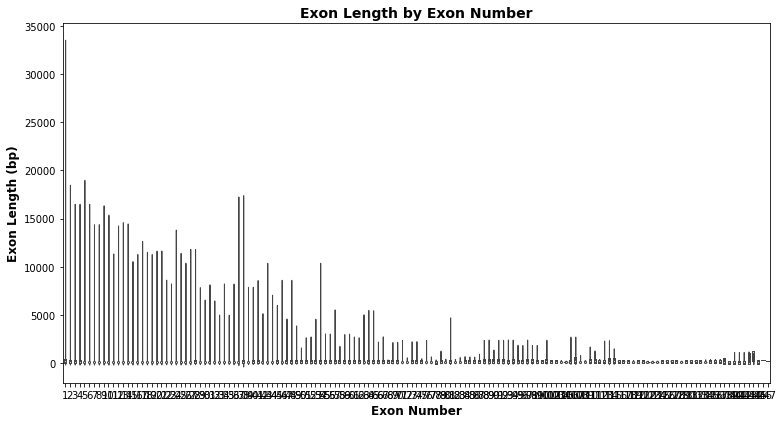

In [54]:
#plotting exon size distributions by exon number
df_exon_length1_1 = pd.DataFrame.from_dict(exonDict, orient='index')
df_exon_length1_2 = df_exon_length1_1.transpose()
df_exon_length1_2.head()

#PLOTTING
f, ax = plt.subplots(figsize=(11, 6))
sns.violinplot(data=df_exon_length1_2, bw=.2, cut=1, linewidth=1)
plt.xlabel('Exon Number', fontweight='bold',fontsize=12)
plt.ylabel('Exon Length (bp)', fontweight='bold',fontsize=12)
plt.title('Exon Length by Exon Number', fontweight='bold',fontsize=14)
plt.tight_layout()



In [ ]:
#plotting exon size distributions by intron number
df_intron_length1_1 = pd.DataFrame.from_dict(intronDict, orient='index')
df_intron_length1_2 = df_intron_length1_1.transpose()
df_intron_length1_2.head()

#PLOTTING
f, ax = plt.subplots(figsize=(11, 6))
sns.violinplot(data=df_intron_length1_2, bw=.2, cut=1, linewidth=1)
plt.xlabel('Intron Number', fontweight='bold',fontsize=12)
plt.ylabel('Intron Length (bp)', fontweight='bold',fontsize=12)
plt.title('Intron Length by Intron Number', fontweight='bold',fontsize=14)
plt.tight_layout()

# PASA OUTPUTS
## Calculating Stats using 2 thresholds of maximum intron lengths during PASA processing: 
## Length 1 = 10,000 bp, Length 2 = 100,000 bp (default for PASA)

In [70]:
length2File = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/PASA_Processing/version_2/pasa-lite_assemblyAssembler_results/pasa-lite_ZoeyTrinity.pasa_assembled_alignments.gtf'

#Keeping track of exon counts/lengths
length2ExonLengths = []
length2ExonCounts = []
exon2Dict = {}
#Keeping track of intron stats
length2IntronLengths = []
intron2Dict = {}

#Keeping track of full leng
length2TranscriptLengths = []

lineCount,transcriptCount = 0,0 
exonCount = 0 # for first call, set to zero

for line in open(length2File,'r'):
    lineCount += 1        
    line=line.rstrip().split('\t')
    if '#' in line[0] or len(line) == 1: #skip header
        continue
    
    #calculate start/end coordinates
    start,end = int(line[3]) - 1, int(line[4])
    length = end - start
    
    if 'transcript' in line[2]:
        transcriptCount += 1
        length2TranscriptLengths.append(length)
        if lineCount != 2:
            length2ExonCounts.append(exonCount) #add the count from the previous gene
        exonCount = 0
        exonCoords, e = [], -1 # to keep track of the start, end coordinates of each exon
        i = 0 #intron index
        
    if 'exon' in line[2]:
        #Add exon length to array:
        length2ExonLengths.append(length)
        exonCount += 1 #Keep track of exon count
        e += 1 #for dict/array index
        exonCoords.append([start,end]) #start/end coordinates per exon
        
        #Storing exon length by exon number:
        if e+1 not in exon2Dict.keys():
            exon2Dict[e+1] = []
        exon2Dict[e+1].append(length)    
        
    # Get intron lengths, means that the gene must have more than one exon
    if exonCount > 1:
        i += 1 #intron index = intron number
        
        #Intron size depends on coordinates of the exons A and B surrounding it:
        startB, endA = exonCoords[e-1][1],exonCoords[e][0]
        intronLength = int(endA) - int(startB)
        length2IntronLengths.append(intronLength)
        if intronLength > 1000000:
            print('long: ',line)
        if intronLength < 0:
            print('negative: ',line)        
        #Storing intron length by intron number:
        if i not in intron2Dict.keys():
            intron2Dict[i] = []
        intron2Dict[i].append(intronLength)

        
print('Stored transcript, exon, and intron stats for %i transcripts' % transcriptCount)


Stored transcript, exon, and intron stats for 1227181 transcripts


###  Comparative stats
### Intron 10,000 vs Intron 100,000

In [74]:
print('#### INTRON LENGTH STATS ####')
print('## 10,000 length max intron')
print('min length of intron = ',min(length1IntronLengths))
print('max length of intron = ',max(length1IntronLengths))
print('mean length of intron = ',np.mean(length1IntronLengths))
print('median length of intron = ',np.median(length1IntronLengths))
print('## 100,000 length max intron')
print('min length of intron = ',min(length2IntronLengths))
print('max length of intron = ',max(length2IntronLengths))
print('mean length of intron = ',np.mean(length2IntronLengths))
print('median length of intron = ',np.median(length2IntronLengths))

print('#### EXON LENGTH STATS ####')
print('## 10,000 length max intron')
print('min length of intron = ',min(length1ExonLengths))
print('max length of intron = ',max(length1ExonLengths))
print('mean length of intron = ',np.mean(length1ExonLengths))
print('median length of intron = ',np.median(length1ExonLengths))
print('## 100,000 length max intron')
print('min length of exon = ',min(length2ExonLengths))
print('max length of exon = ',max(length2ExonLengths))
print('mean length of exon = ',np.mean(length2ExonLengths))
print('median length of exon = ',np.median(length2ExonLengths))

#### INTRON LENGTH STATS ####
## 10,000 length max intron
min length of intron =  -8220
max length of intron =  2028351
mean length of intron =  2615.58283005
median length of intron =  853.0
## 100,000 length max intron
min length of intron =  10
max length of intron =  199790
mean length of intron =  2683.12057097
median length of intron =  898.0
#### EXON LENGTH STATS ####
## 10,000 length max intron
min length of intron =  2
max length of intron =  33430
mean length of intron =  331.267270136
median length of intron =  168.0
## 100,000 length max intron
min length of exon =  2
max length of exon =  33430
mean length of exon =  332.823287791
median length of exon =  168.0


/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 300000)

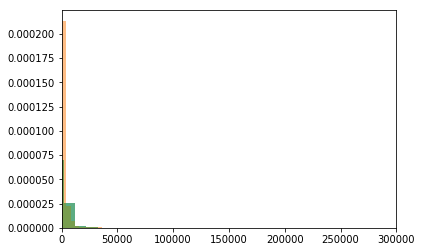

In [67]:
#Plotting intron size distribution of LENGTH 1 (10,000) vs LENGTH 2 (100,000)
_ = plt.hist(length1IntronLengths,bins=200,normed=True,alpha=0.5)
_ = plt.hist(length2IntronLengths,bins=50,normed=True,alpha=0.5)
plt.xlim(0,300000)
